<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Required-Packages" data-toc-modified-id="Importing-Required-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Required Packages</a></span></li><li><span><a href="#Importing-the-Dataset" data-toc-modified-id="Importing-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the Dataset</a></span></li><li><span><a href="#Preliminary-Plots" data-toc-modified-id="Preliminary-Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preliminary Plots</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Visualizing-Train-Set" data-toc-modified-id="Visualizing-Train-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizing Train Set</a></span><ul class="toc-item"><li><span><a href="#Yearly-Trends" data-toc-modified-id="Yearly-Trends-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Yearly Trends</a></span><ul class="toc-item"><li><span><a href="#Line-Plots" data-toc-modified-id="Line-Plots-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Line Plots</a></span></li><li><span><a href="#Box-Plots" data-toc-modified-id="Box-Plots-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Box Plots</a></span></li></ul></li><li><span><a href="#Distribution-of-Data" data-toc-modified-id="Distribution-of-Data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Distribution of Data</a></span></li><li><span><a href="#Data-Decomposition" data-toc-modified-id="Data-Decomposition-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Data Decomposition</a></span><ul class="toc-item"><li><span><a href="#Additive-Decomposition" data-toc-modified-id="Additive-Decomposition-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Additive Decomposition</a></span></li><li><span><a href="#Multiplicative-Decomposition" data-toc-modified-id="Multiplicative-Decomposition-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Multiplicative Decomposition</a></span></li></ul></li><li><span><a href="#Smoothing-(Moving-Average)" data-toc-modified-id="Smoothing-(Moving-Average)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Smoothing (Moving Average)</a></span></li><li><span><a href="#Correlation-Plots" data-toc-modified-id="Correlation-Plots-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Correlation Plots</a></span><ul class="toc-item"><li><span><a href="#ACF" data-toc-modified-id="ACF-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>ACF</a></span></li><li><span><a href="#PACF" data-toc-modified-id="PACF-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>PACF</a></span></li></ul></li><li><span><a href="#Stationarity-Check" data-toc-modified-id="Stationarity-Check-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Stationarity Check</a></span><ul class="toc-item"><li><span><a href="#Visual-Inspection" data-toc-modified-id="Visual-Inspection-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Visual Inspection</a></span></li><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Summary Statistics</a></span></li><li><span><a href="#ADF-Test" data-toc-modified-id="ADF-Test-5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>ADF Test</a></span></li><li><span><a href="#KPSS-Test" data-toc-modified-id="KPSS-Test-5.6.4"><span class="toc-item-num">5.6.4&nbsp;&nbsp;</span>KPSS Test</a></span></li><li><span><a href="#Stationarity-Conclusion" data-toc-modified-id="Stationarity-Conclusion-5.6.5"><span class="toc-item-num">5.6.5&nbsp;&nbsp;</span>Stationarity Conclusion</a></span></li></ul></li></ul></li></ul></div>

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt
import statsmodels.api as sm 

from statsmodels.tsa.stattools import adfuller, kpss

import warnings

sns.set()
warnings.filterwarnings("ignore")

# Importing the Dataset

In [2]:
data_backup = pd.read_csv("data.csv")
data_backup.Date = pd.to_datetime(data_backup.Date)
data_backup.set_index("Date", inplace = True)

In [3]:
data_backup.head()

spx   spx_ret   spx_vol
Date                                      
1994-01-06  467.119995       NaN       NaN
1994-01-07  469.899994  0.595136  0.595136
1994-01-10  475.269989  1.142795  1.142795
1994-01-11  474.130005 -0.239860  0.239860
1994-01-12  474.170013  0.008438  0.008438

Taking out all the columns corresponding to **SPX** market index.

In [4]:
data = data_backup.copy()

In [5]:
data.head()

spx   spx_ret   spx_vol
Date                                      
1994-01-06  467.119995       NaN       NaN
1994-01-07  469.899994  0.595136  0.595136
1994-01-10  475.269989  1.142795  1.142795
1994-01-11  474.130005 -0.239860  0.239860
1994-01-12  474.170013  0.008438  0.008438

# Preliminary Plots

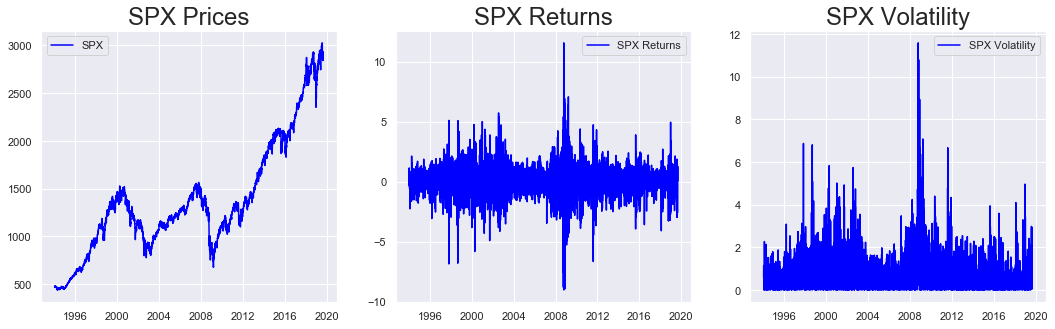

In [6]:
plt.rcParams["figure.figsize"] = (18, 5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(data.spx, color = "blue", label = "SPX")
ax[0].set_title("SPX Prices", size = 24)
ax[0].legend()

ax[1].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1].set_title("SPX Returns", size = 24)
ax[1].legend()

ax[2].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2].set_title("SPX Volatility", size = 24)
ax[2].legend()

plt.show()

# Train Test Split

In this analysis, the idea is to use data till **1st Jan 2019** as train data, and try and predict the trends observed in the months of 2019.

In [7]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]

In [8]:
train_df.shape

(6518, 3)

In [9]:
train_df.describe()

spx      spx_ret      spx_vol
count  6518.000000  6517.000000  6517.000000
mean   1341.983220     0.032175     0.746124
std     551.838480     1.130007     0.849214
min     438.920013    -9.034978     0.000000
25%    1007.882523    -0.424213     0.190105
50%    1254.020020     0.028266     0.495556
75%    1507.727478     0.550266     1.006658
max    2930.750000    11.580037    11.580037

In [10]:
test_df.shape

(174, 3)

# Visualizing Train Set

## Yearly Trends

Let us analyse how the data changed each year using line plots and box plots.

### Line Plots

- **SPX Prices**

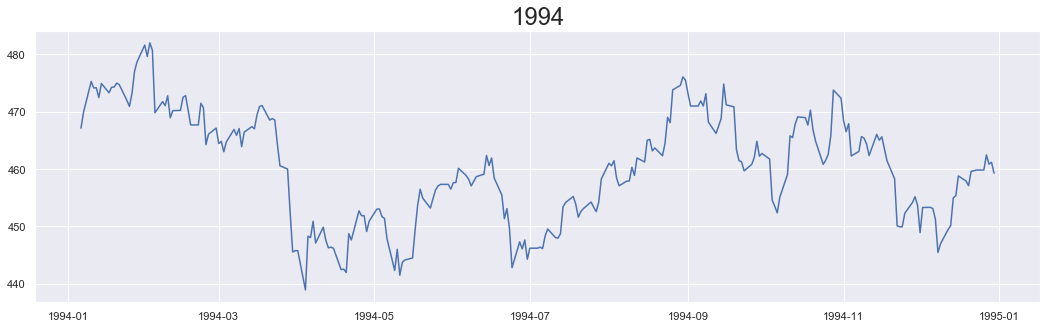

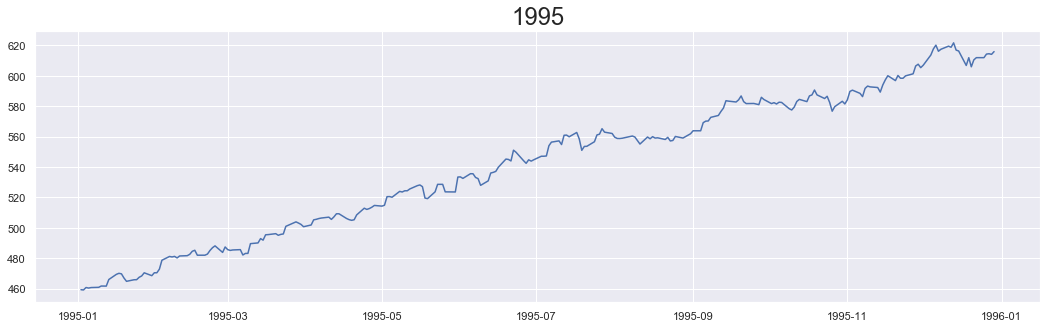

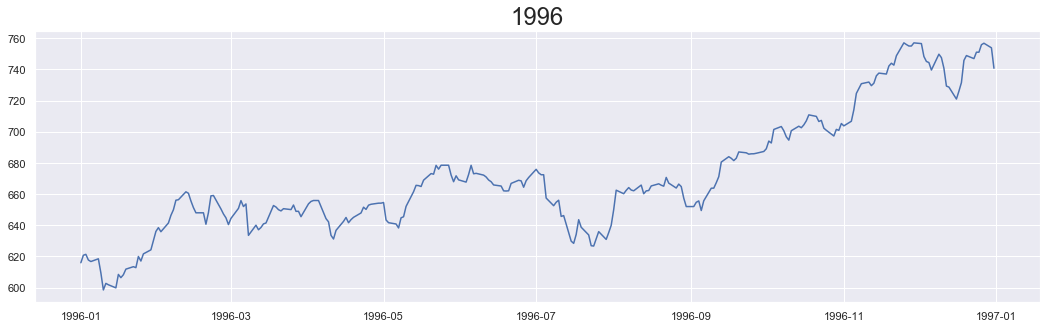

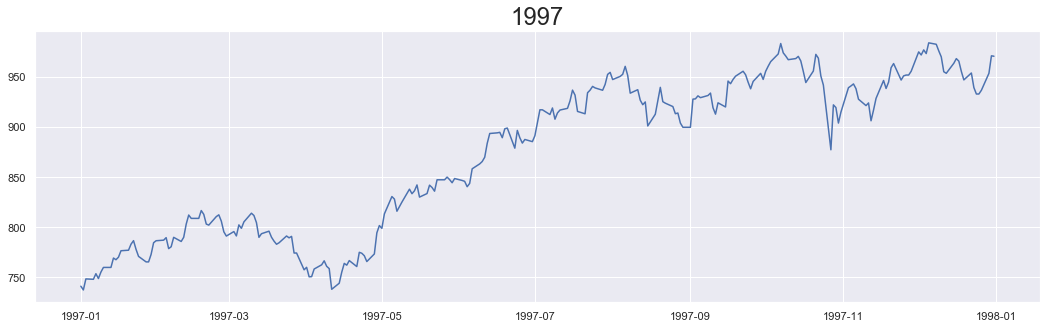

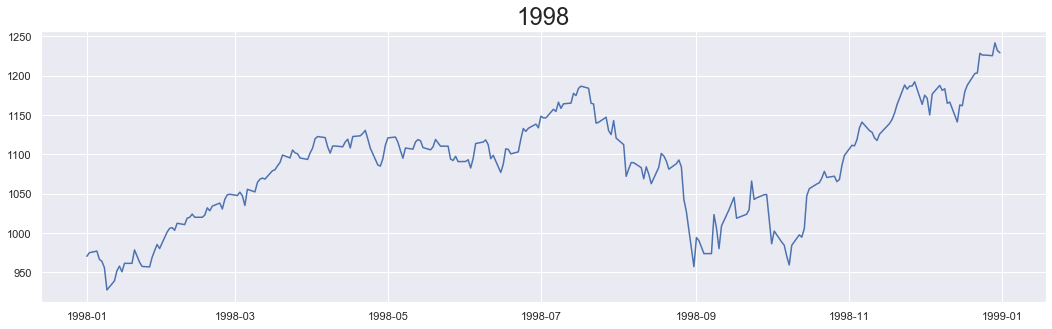

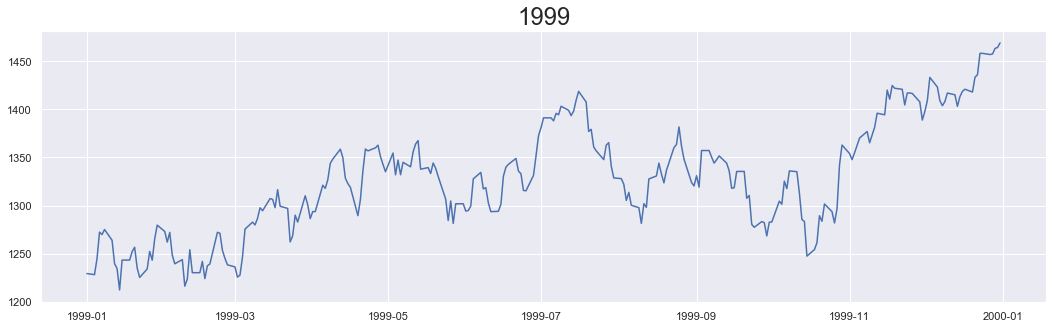

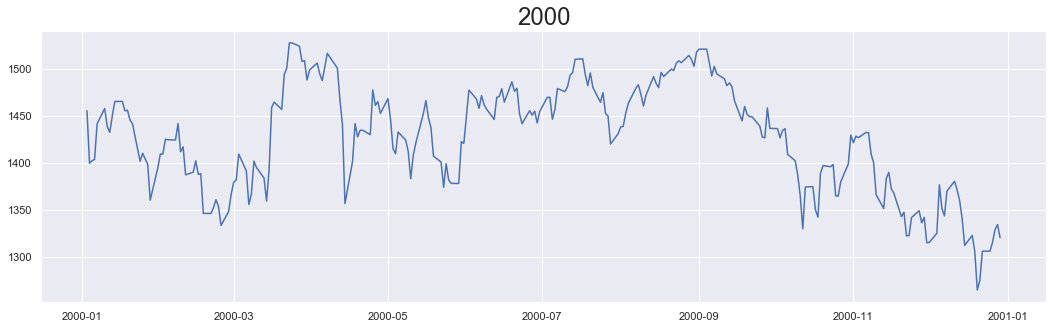

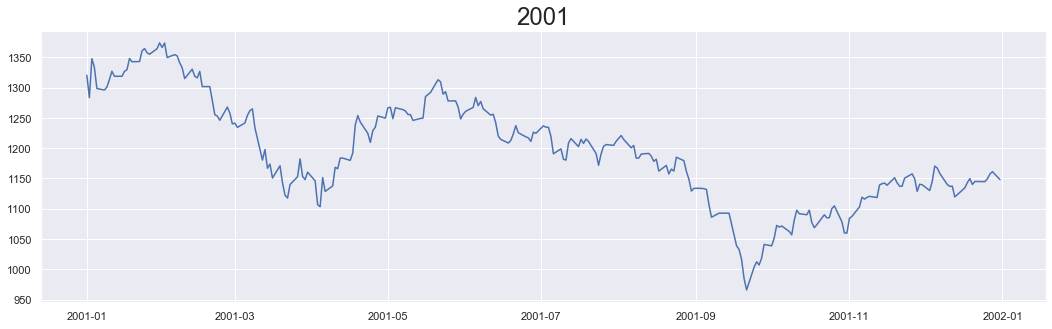

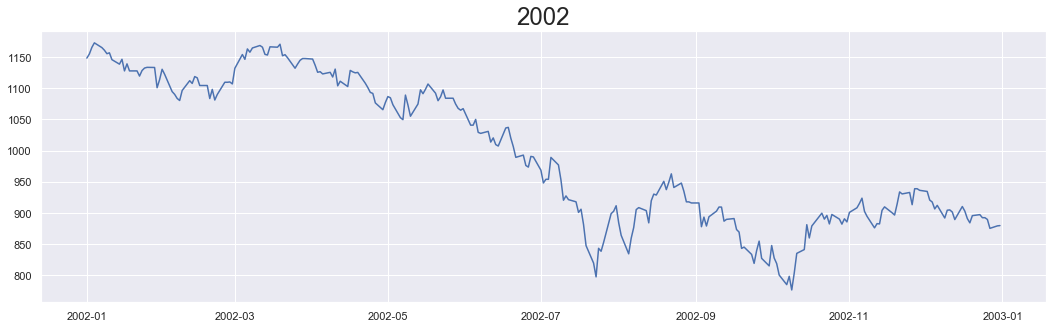

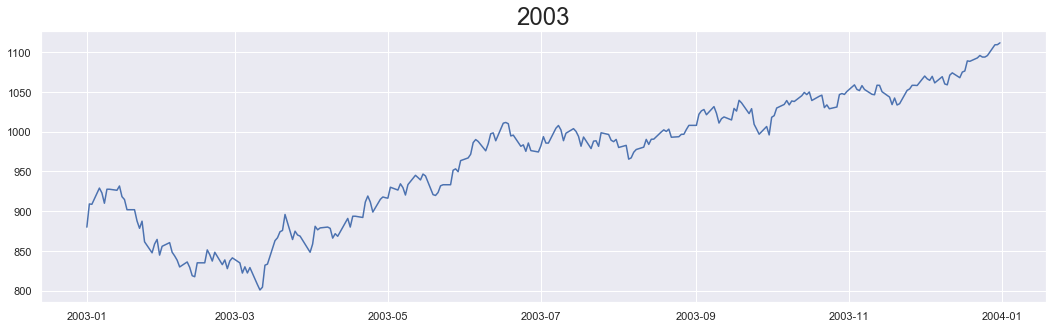

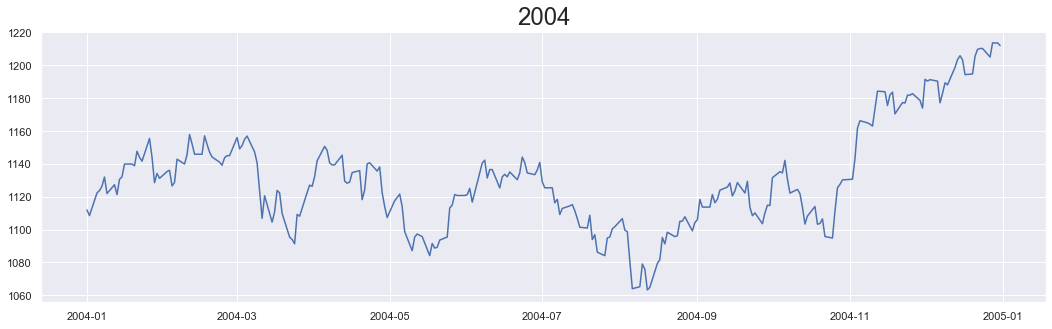

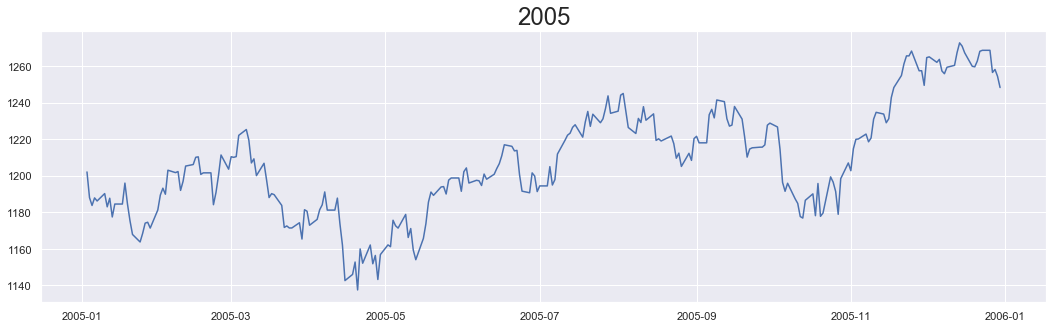

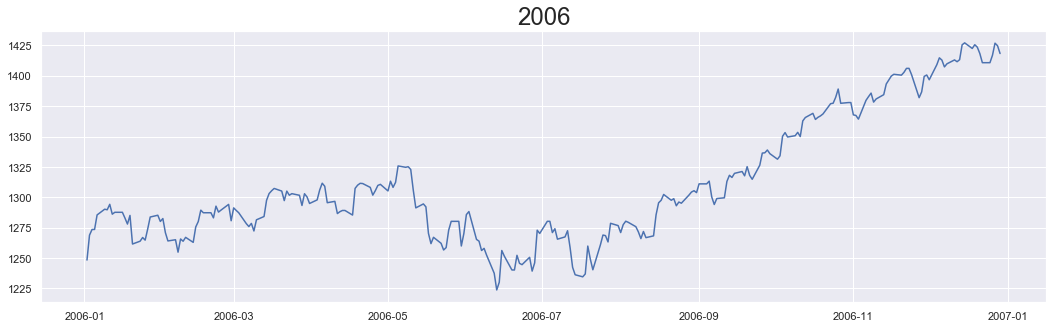

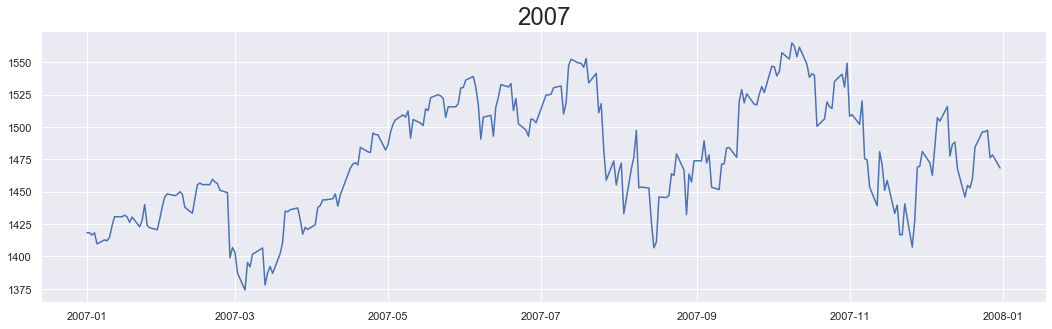

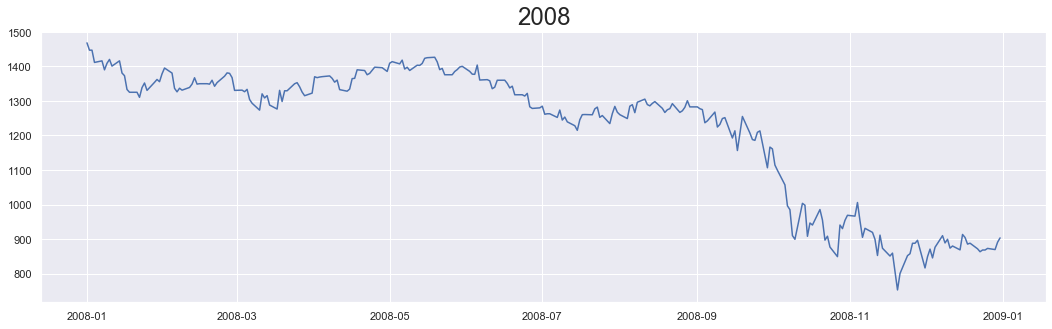

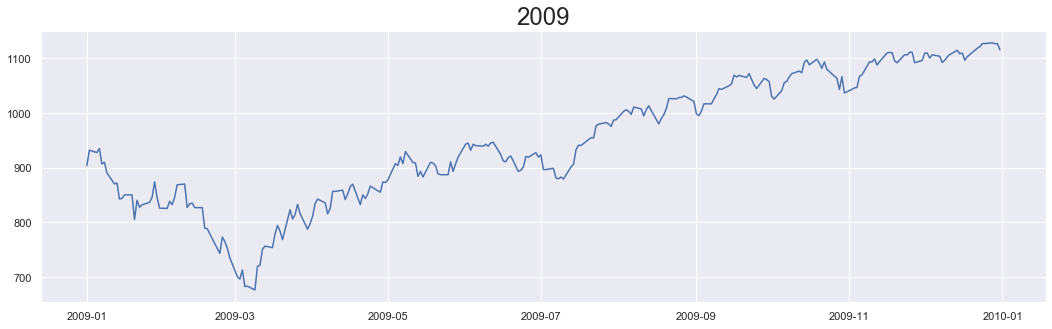

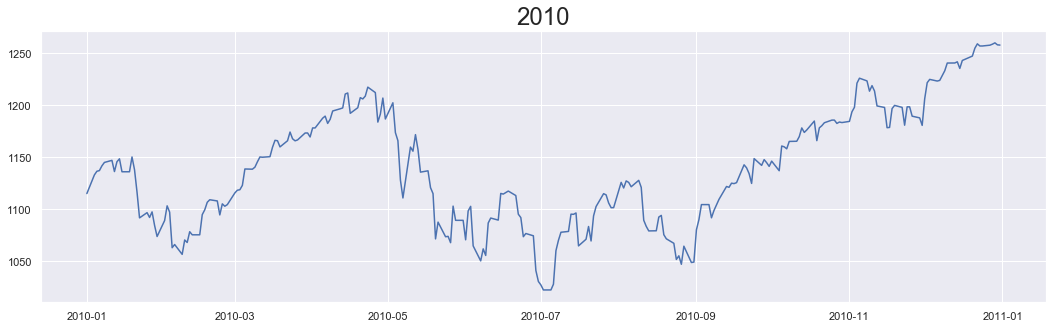

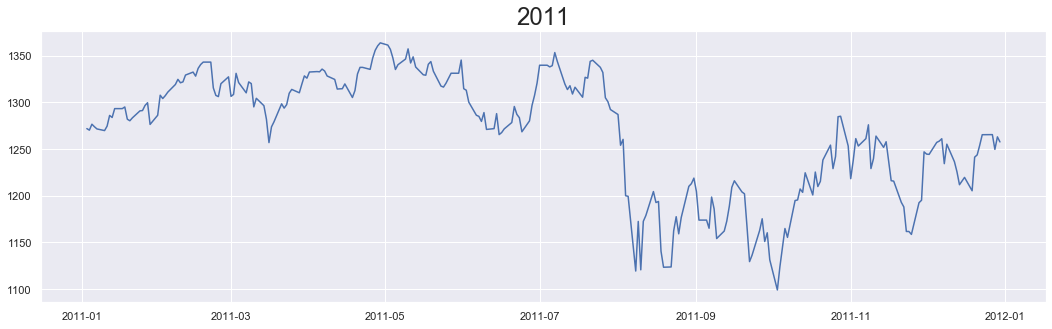

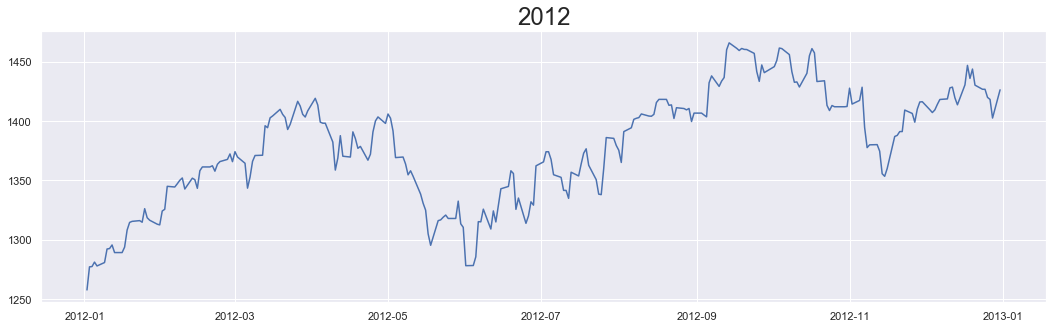

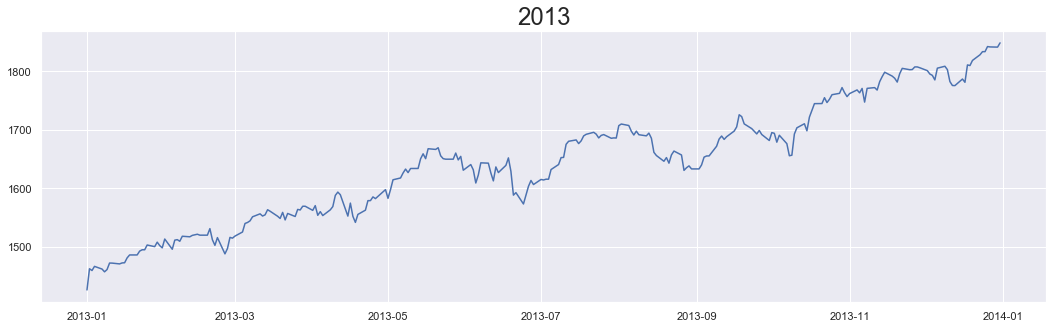

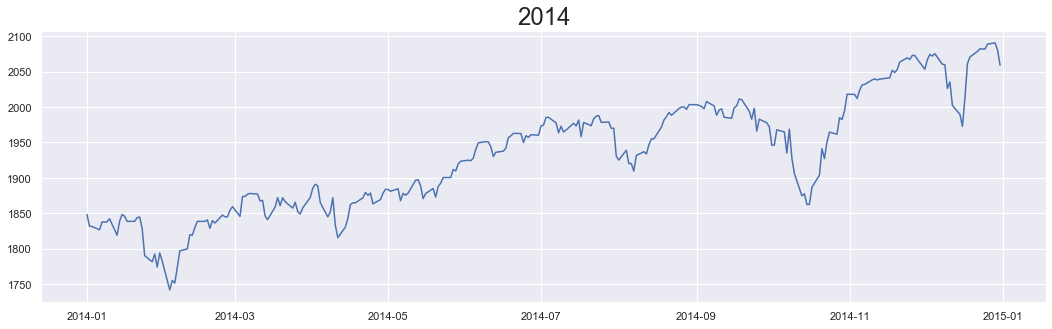

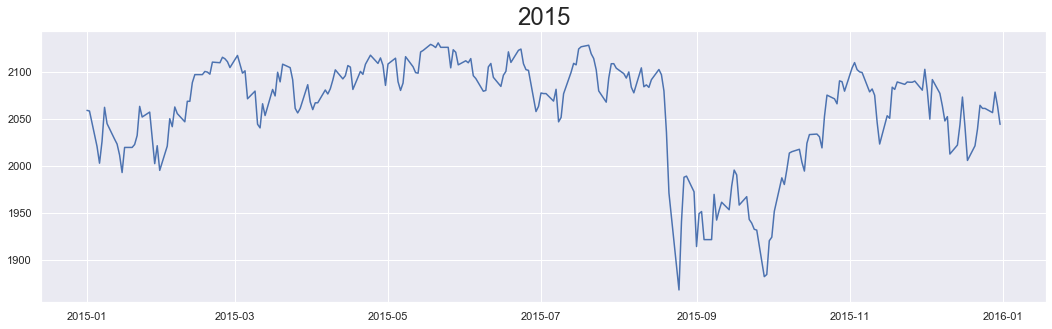

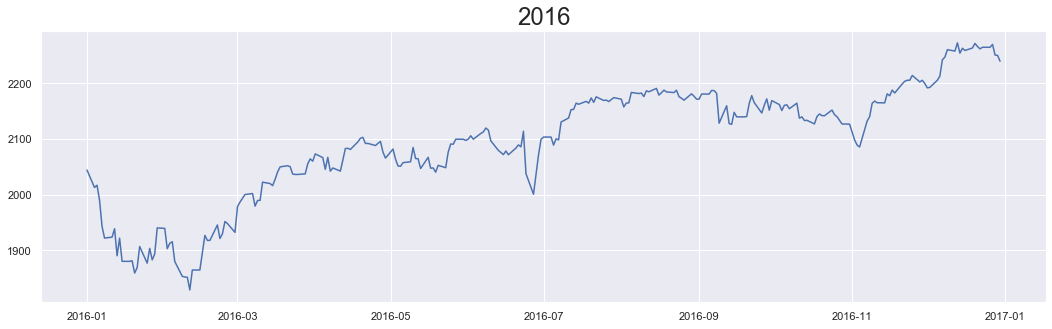

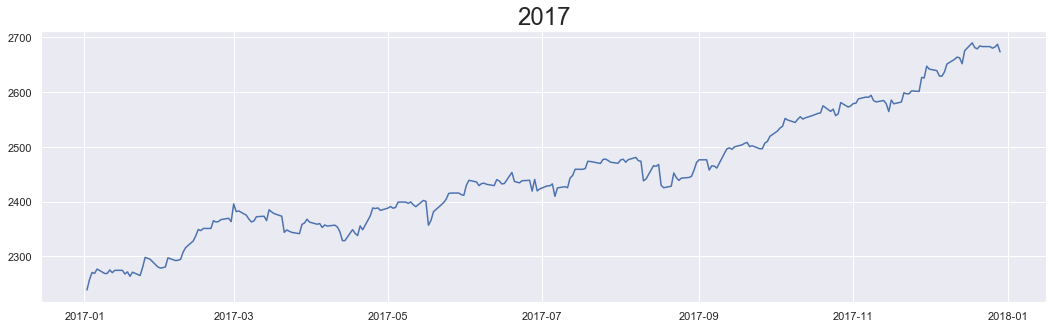

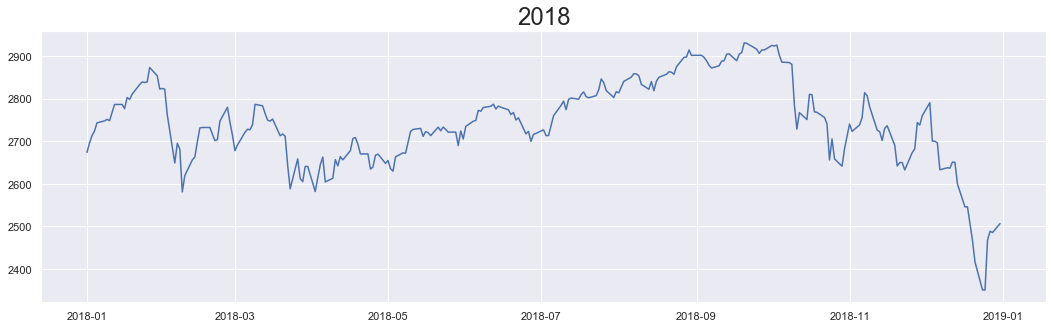

In [11]:
plt.rcParams["figure.figsize"] = 18, 5

for year in set(train_df.index.year):
    plt.plot(train_df[["spx"]].loc[train_df.index.year == year])
    plt.title(str(year), size = 24)
    plt.show()

- **SPX Returns**

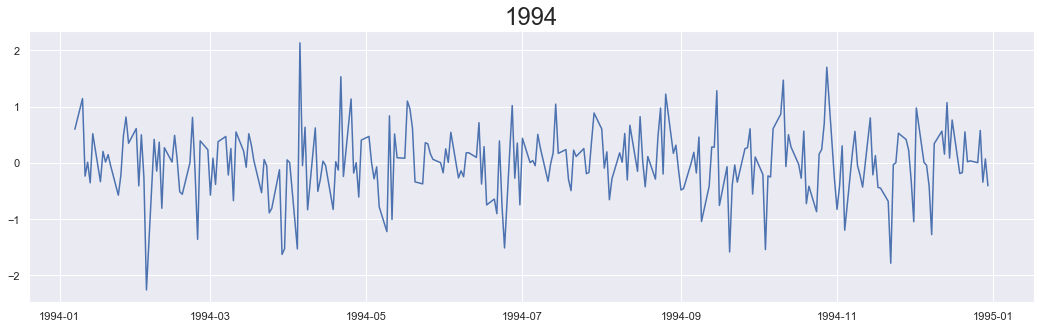

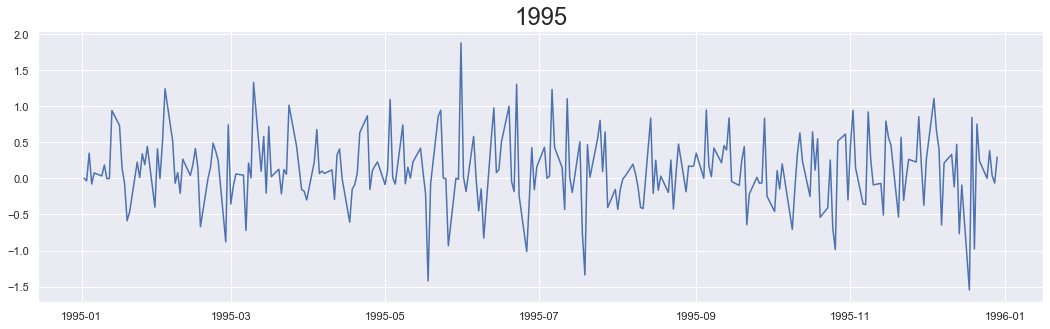

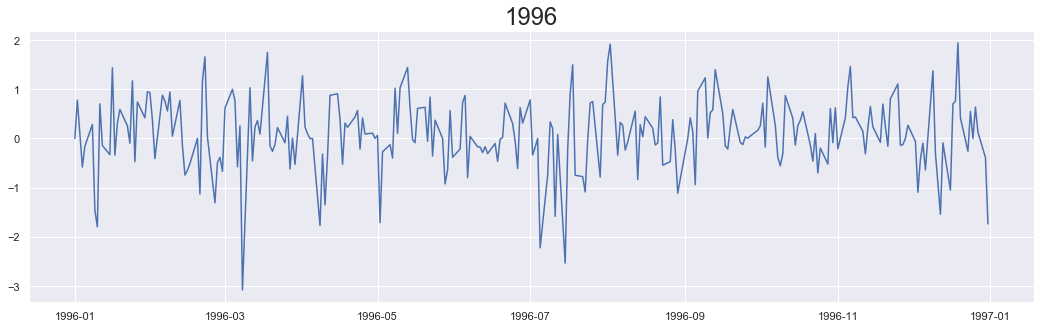

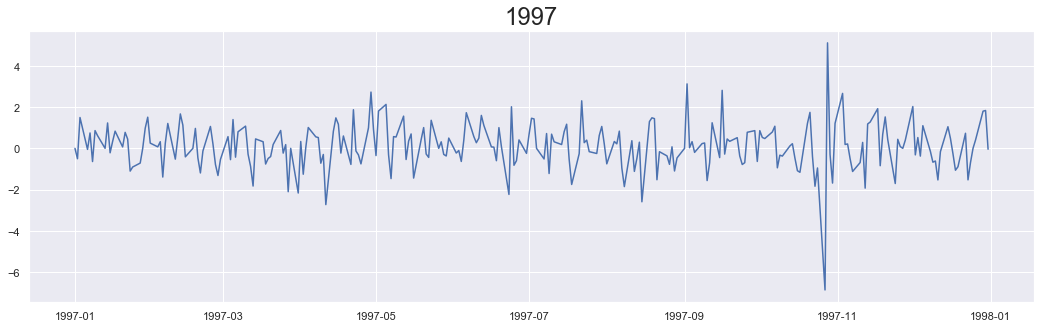

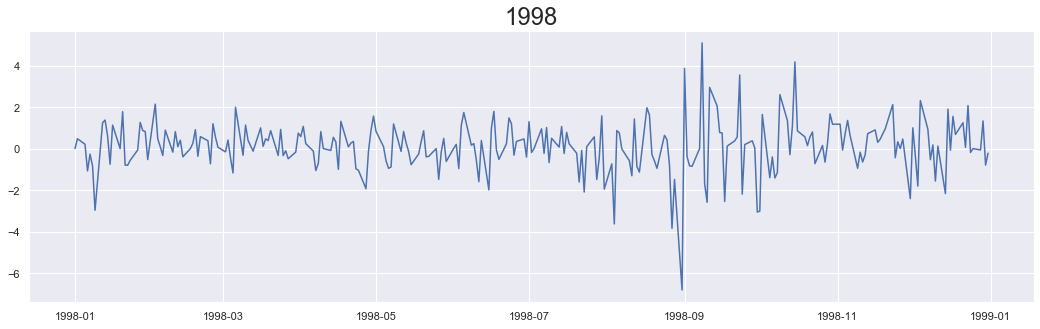

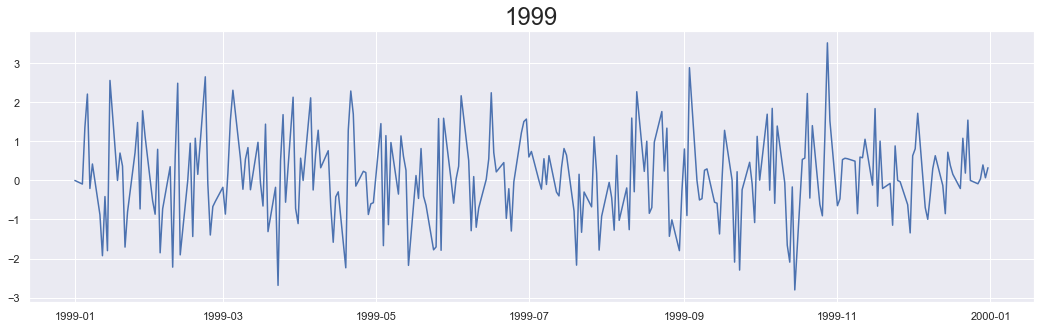

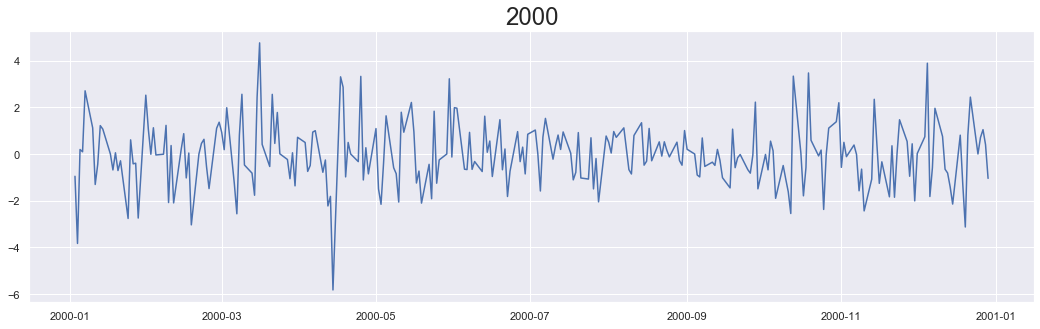

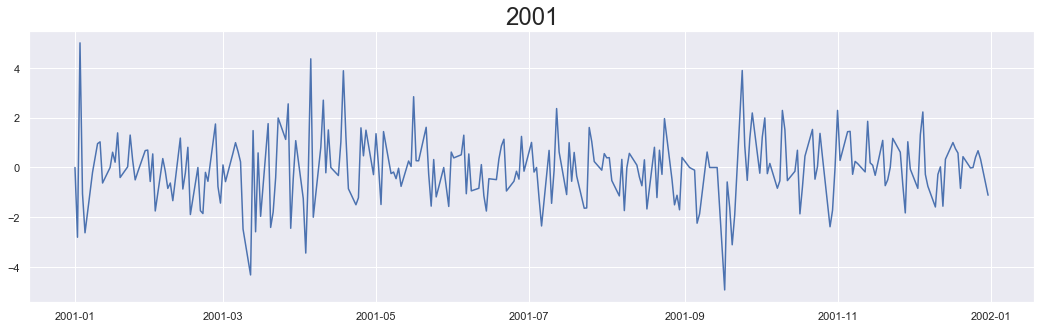

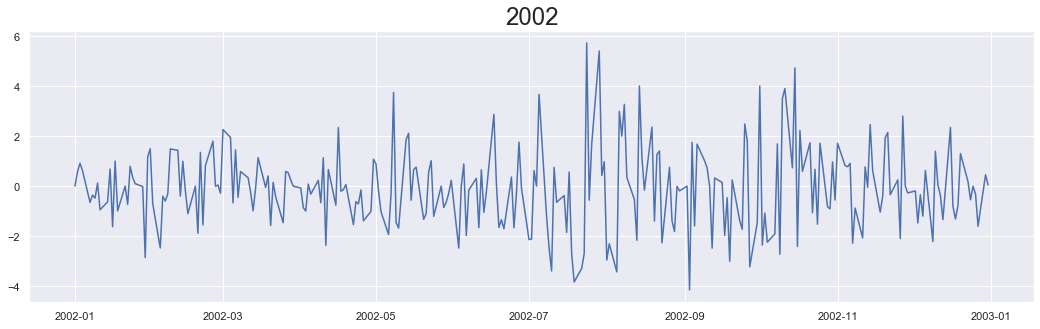

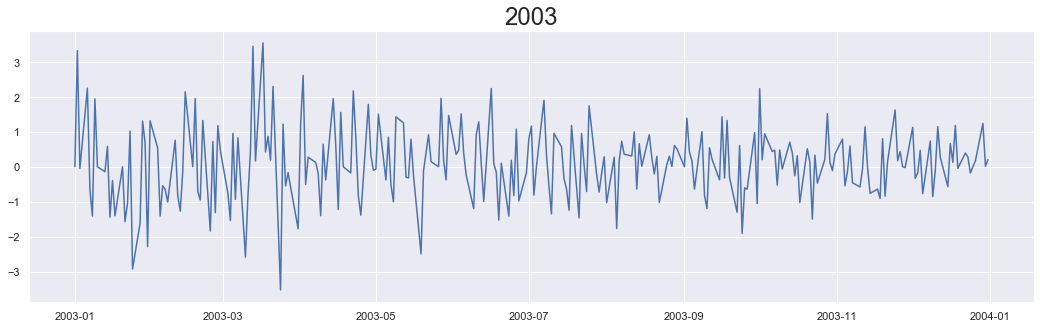

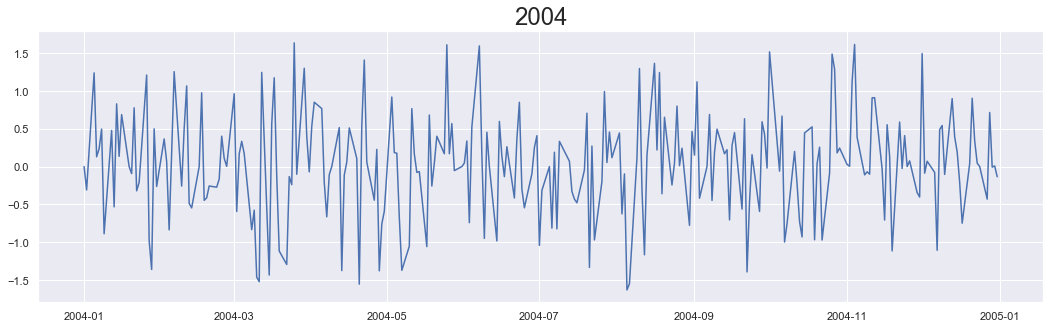

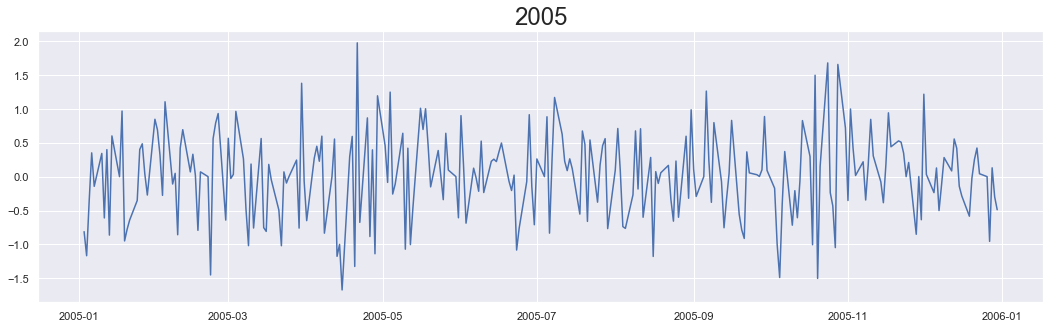

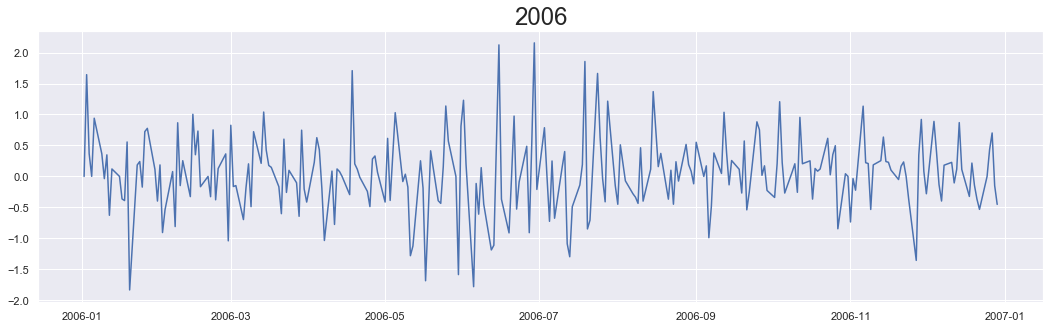

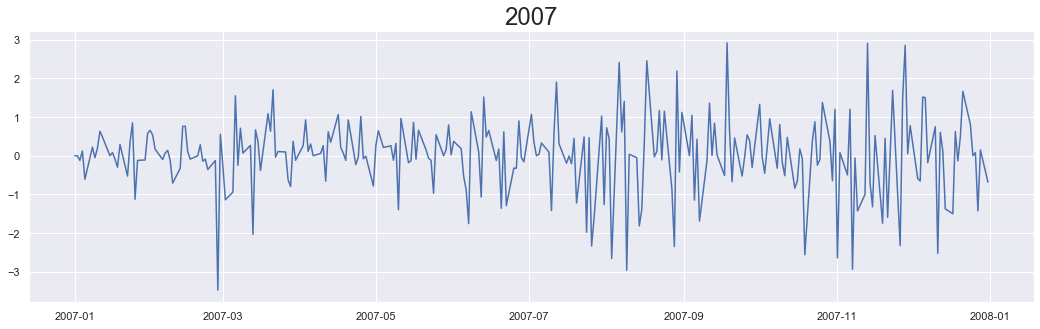

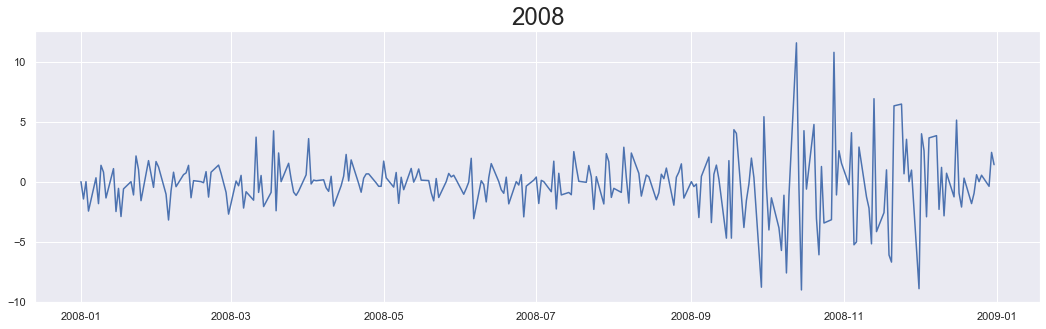

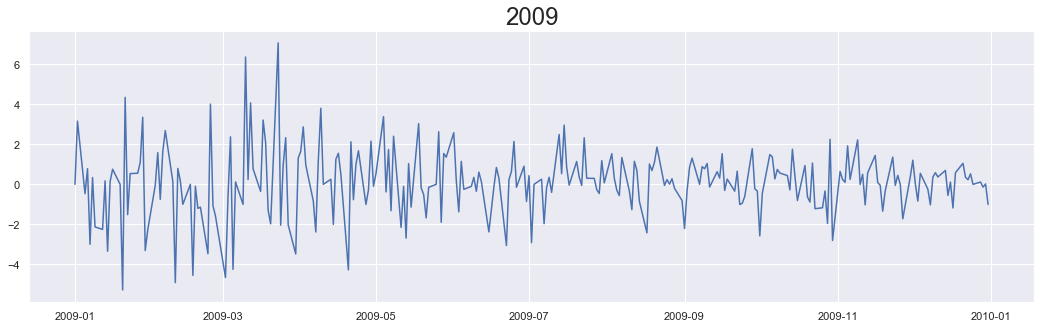

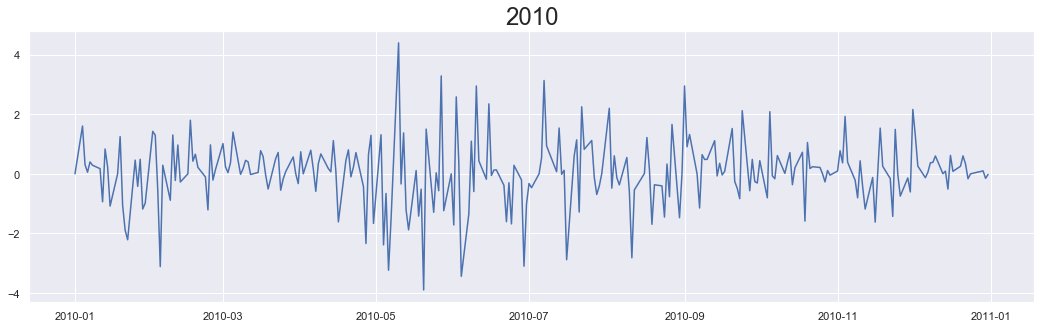

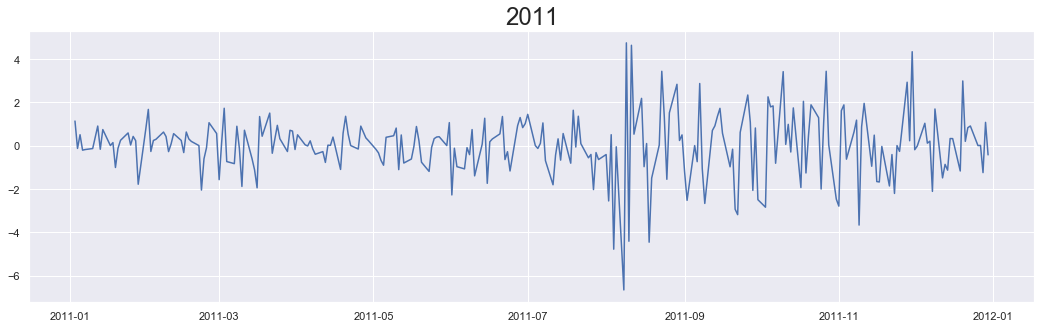

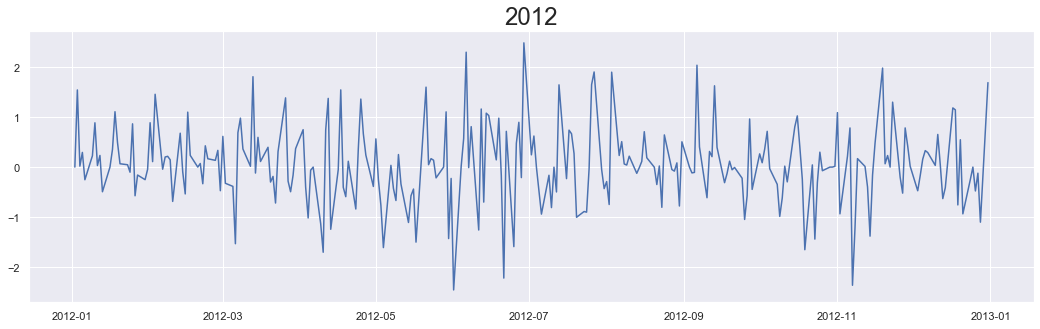

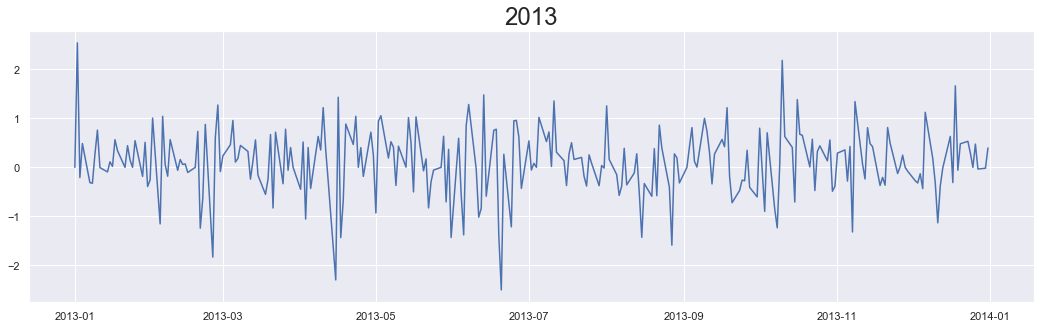

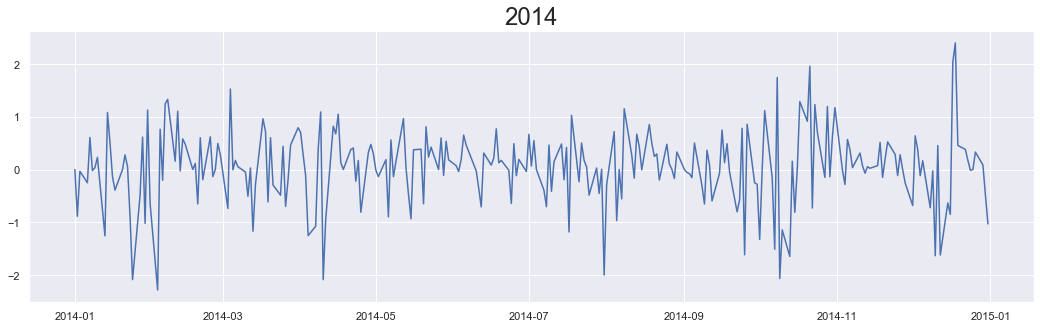

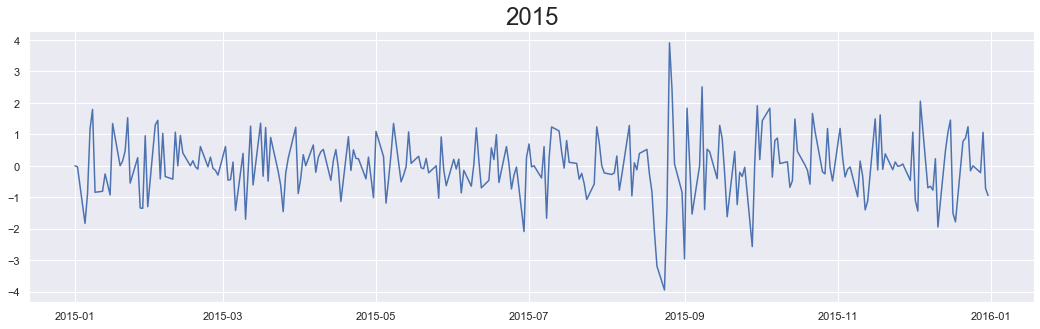

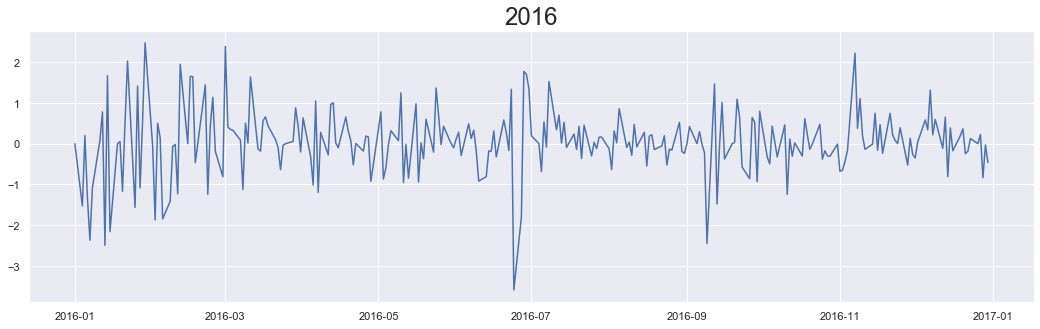

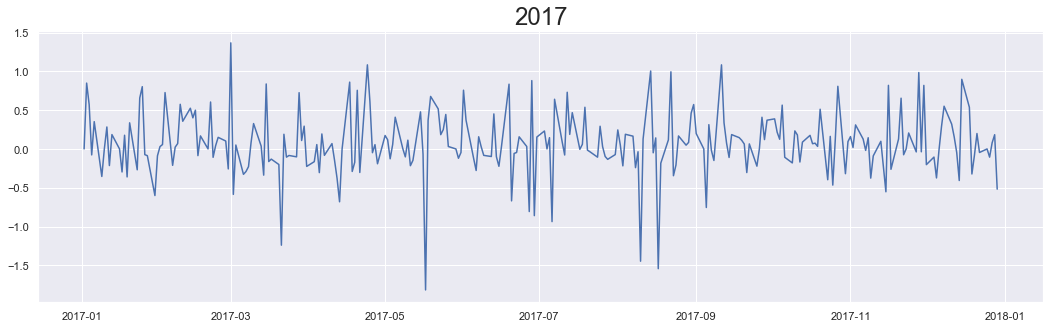

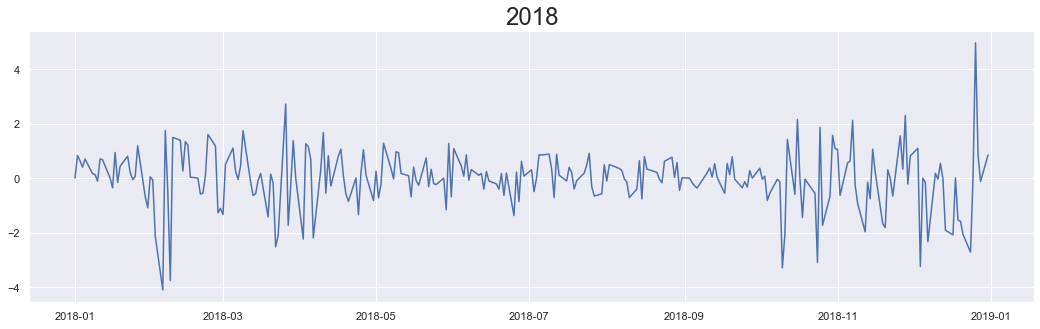

In [12]:
plt.rcParams["figure.figsize"] = 18, 5

for year in set(train_df.index.year):
    plt.plot(train_df[["spx_ret"]].loc[train_df.index.year == year])
    plt.title(str(year), size = 24)
    plt.show()

- **SPX Volatility**

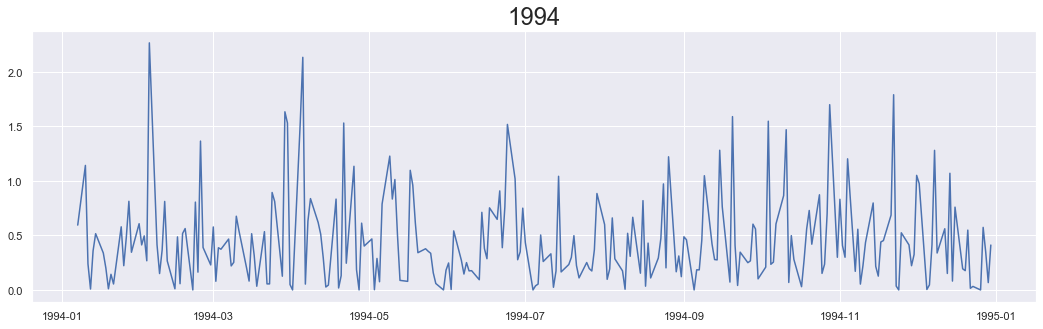

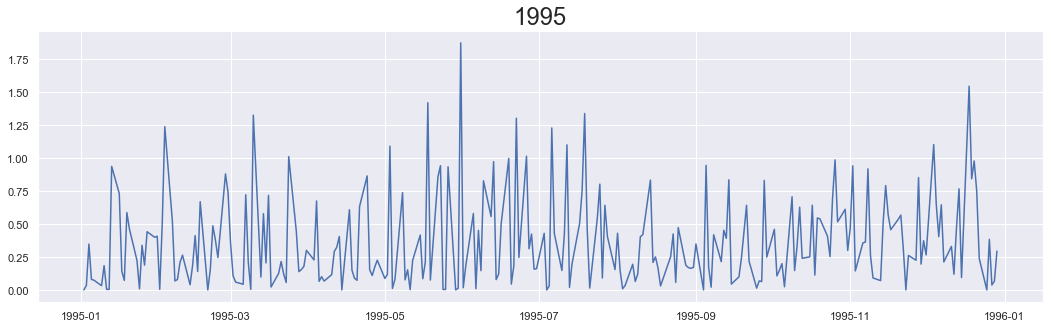

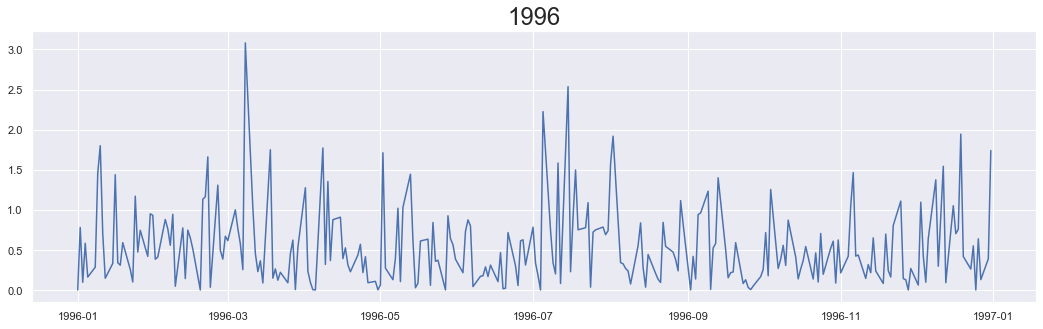

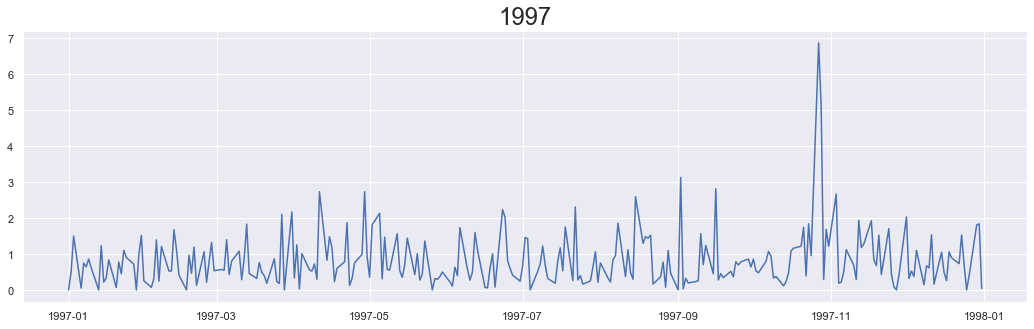

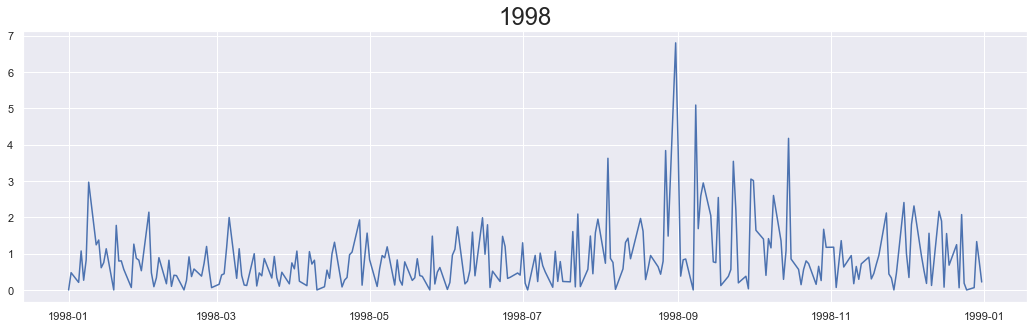

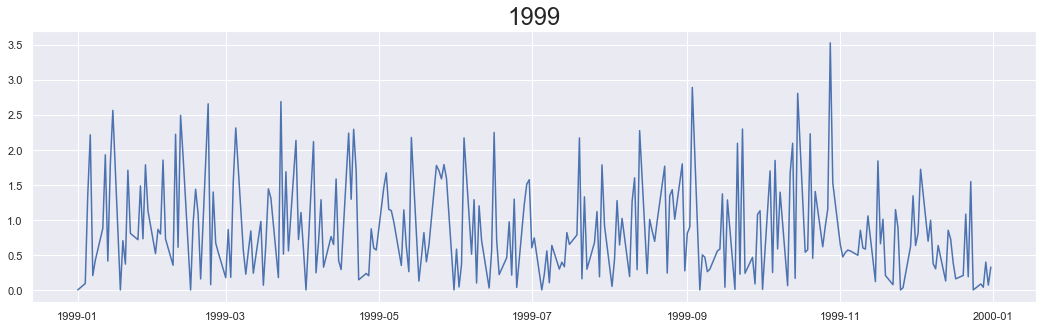

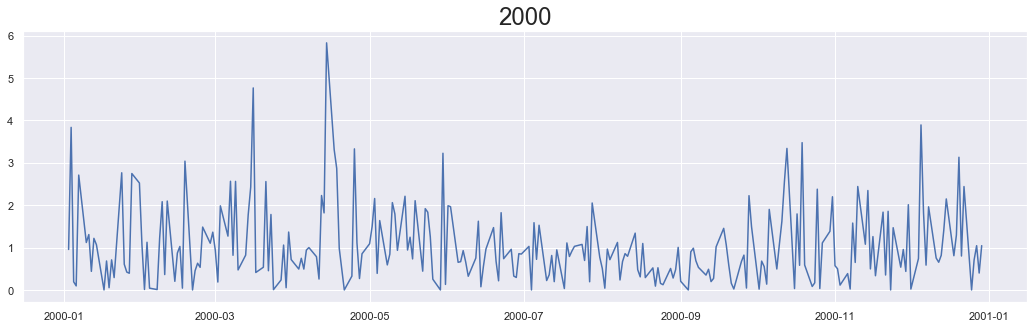

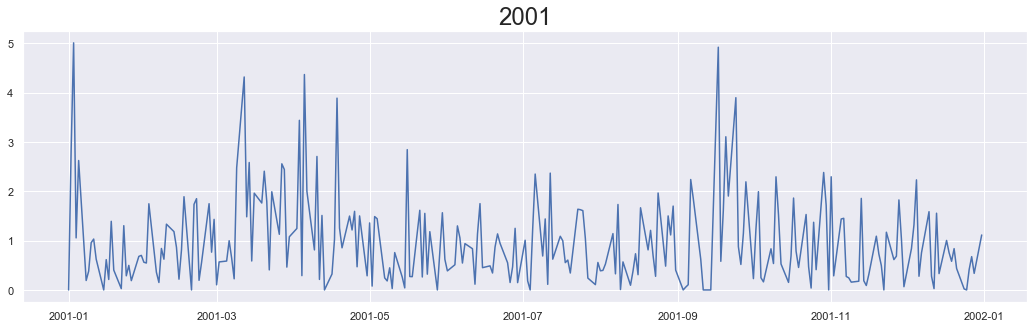

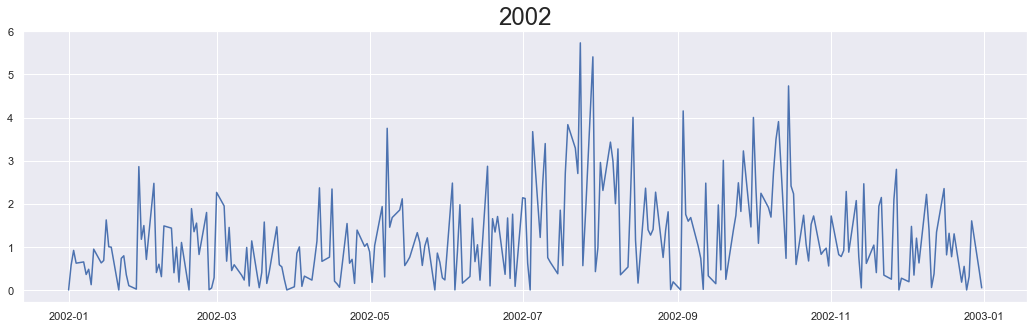

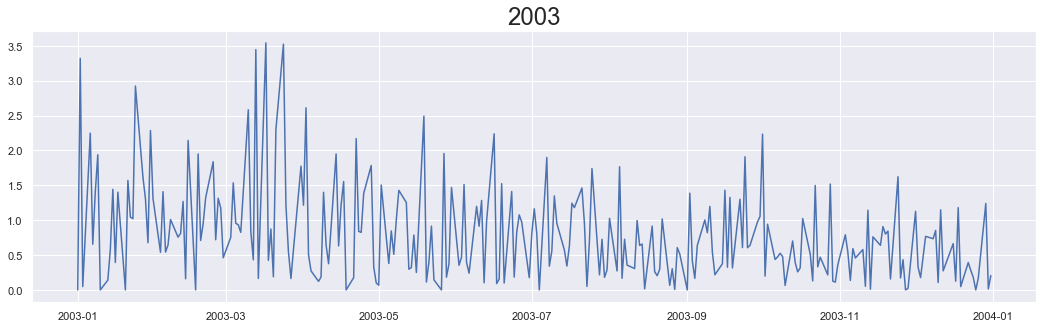

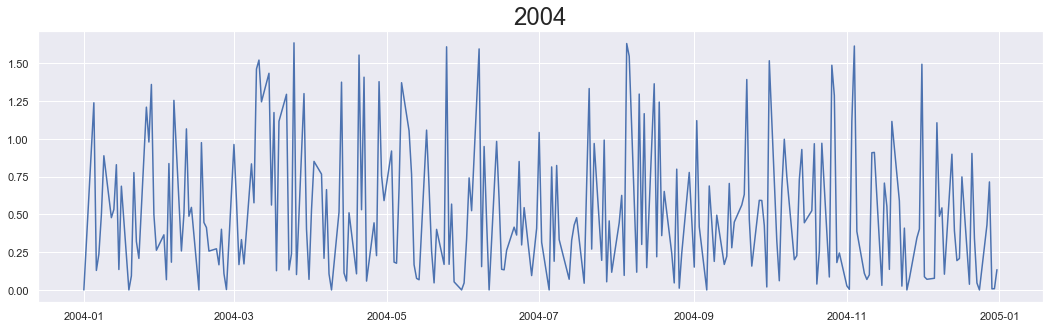

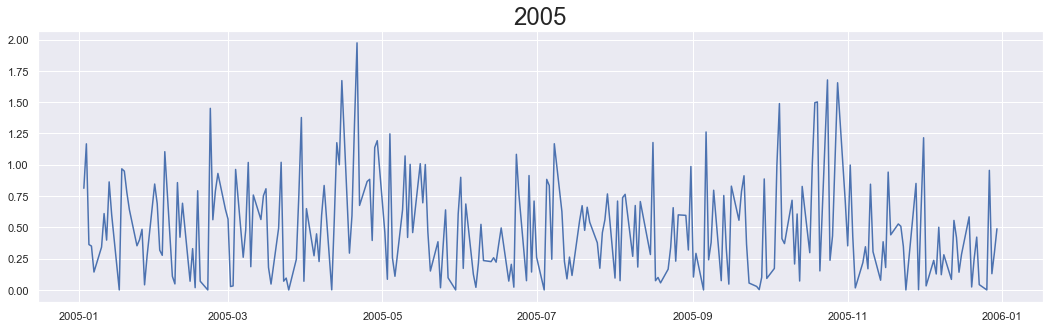

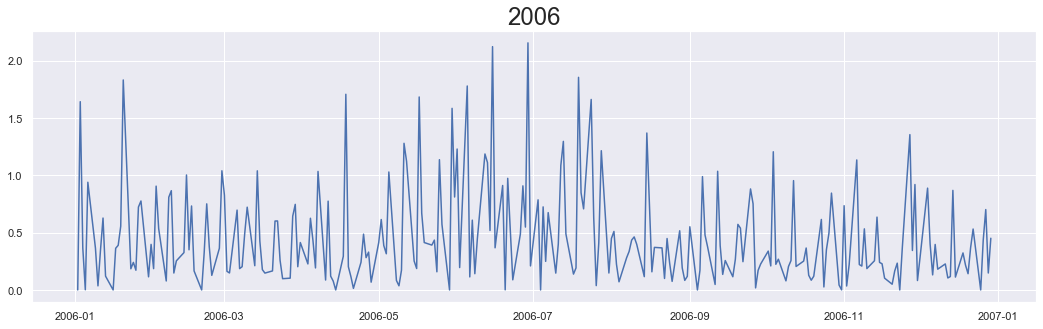

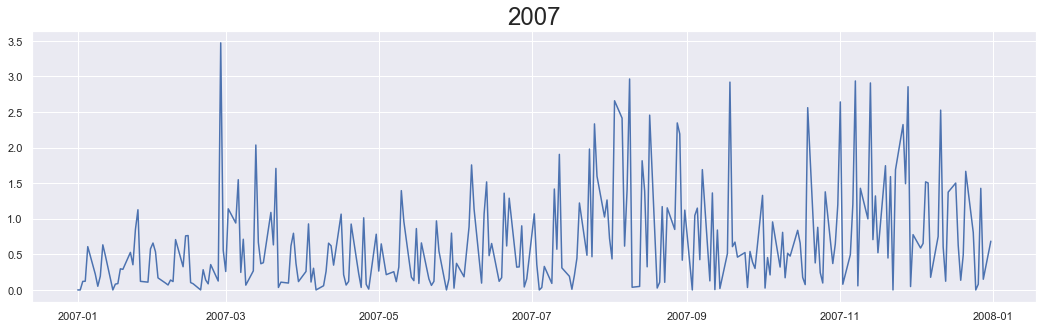

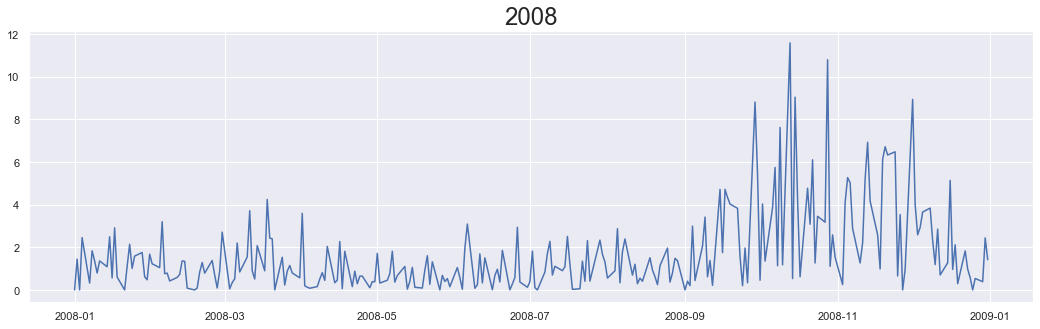

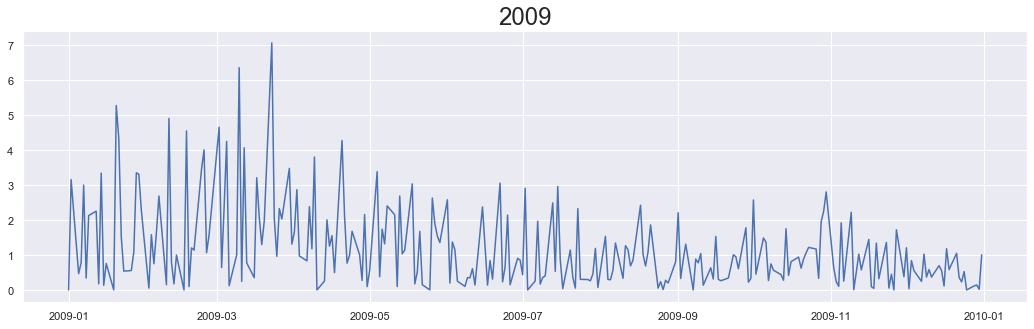

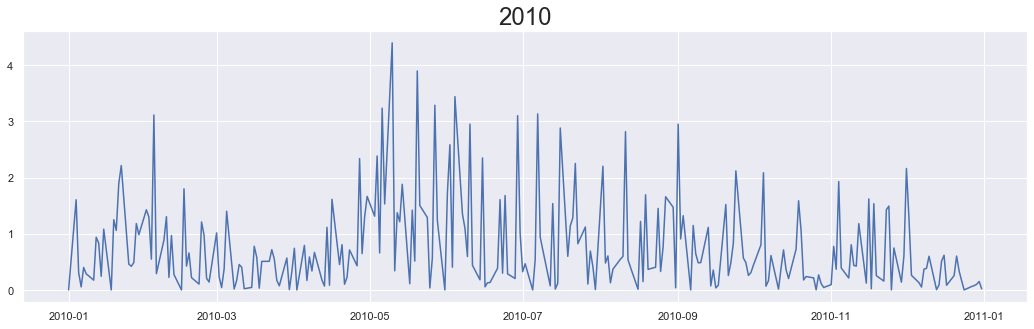

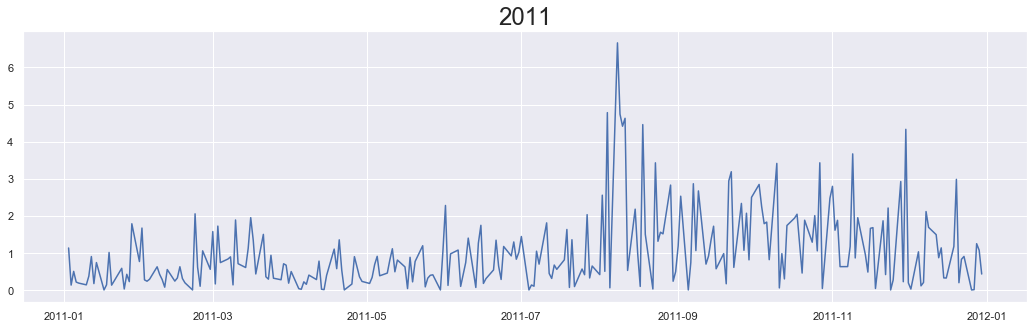

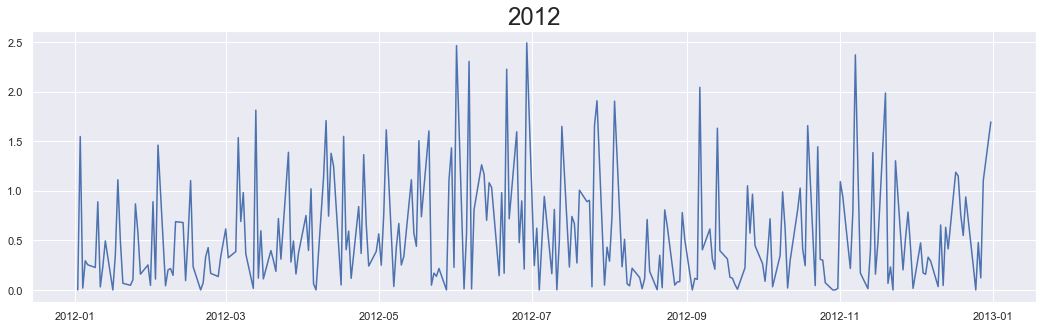

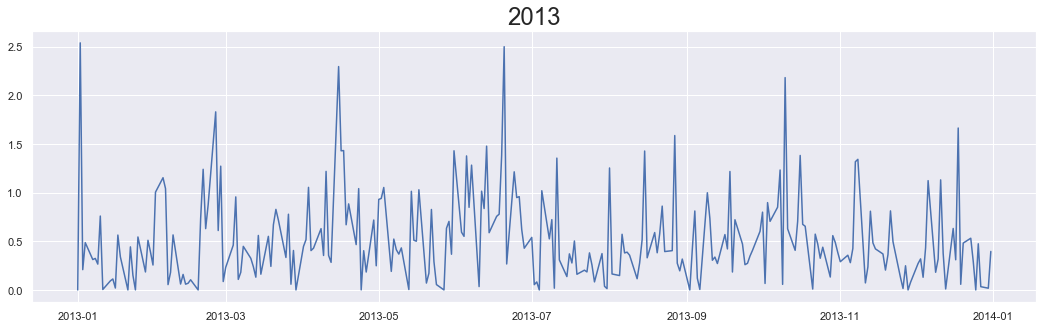

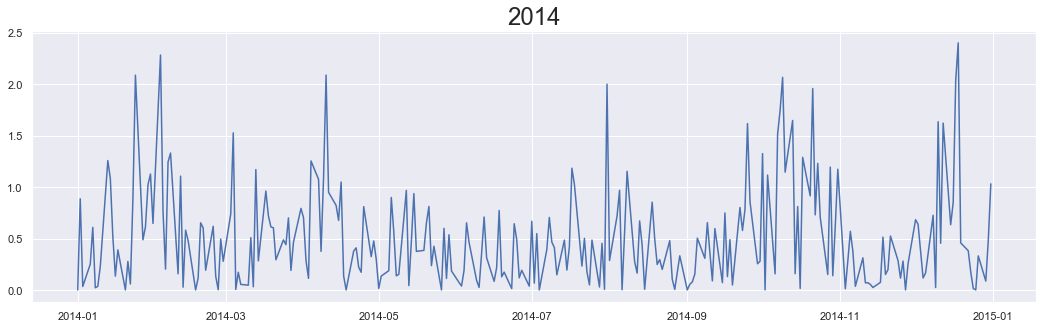

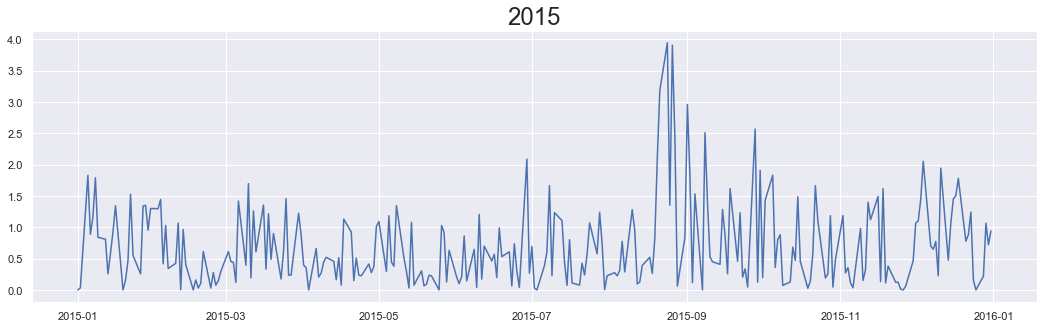

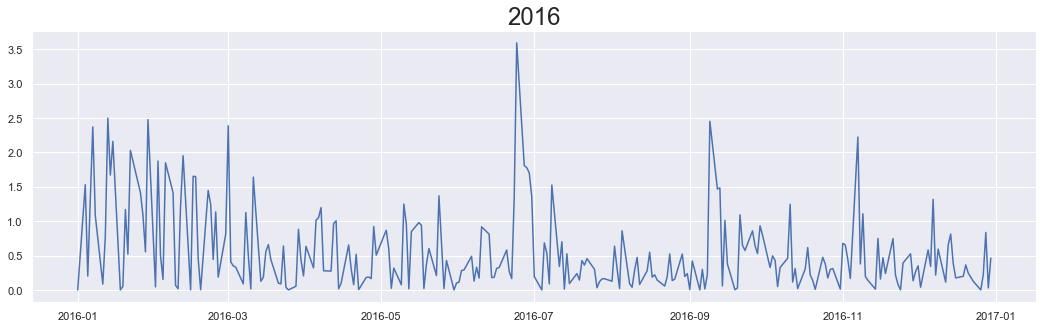

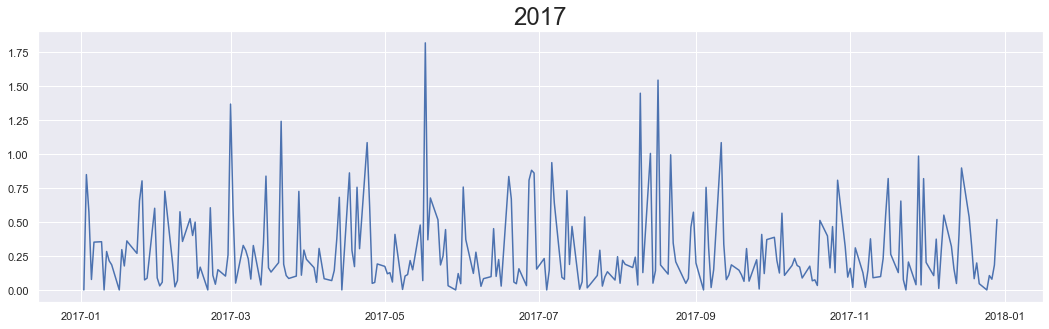

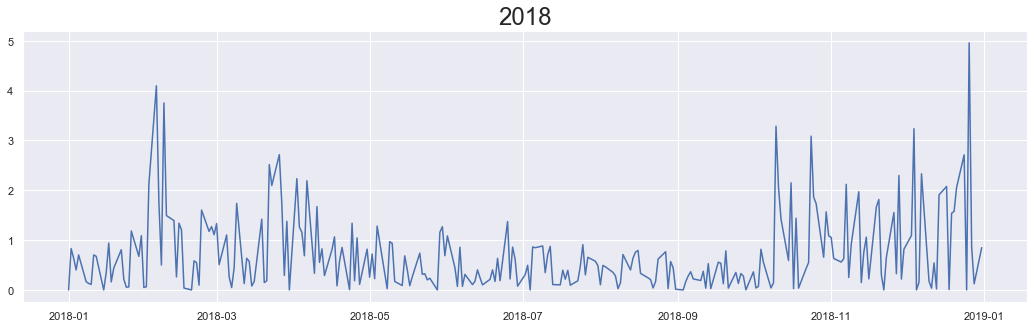

In [13]:
plt.rcParams["figure.figsize"] = 18, 5

for year in set(train_df.index.year):
    plt.plot(train_df[["spx_vol"]].loc[train_df.index.year == year])
    plt.title(str(year), size = 24)
    plt.show()

The plots show in which years the market was stable - categorized by seemingly straight lines in SPX prices plots, or by less spikes in the Returns and Volatility curves. 

### Box Plots

In [14]:
train_df["Year"] = train_df.index.year

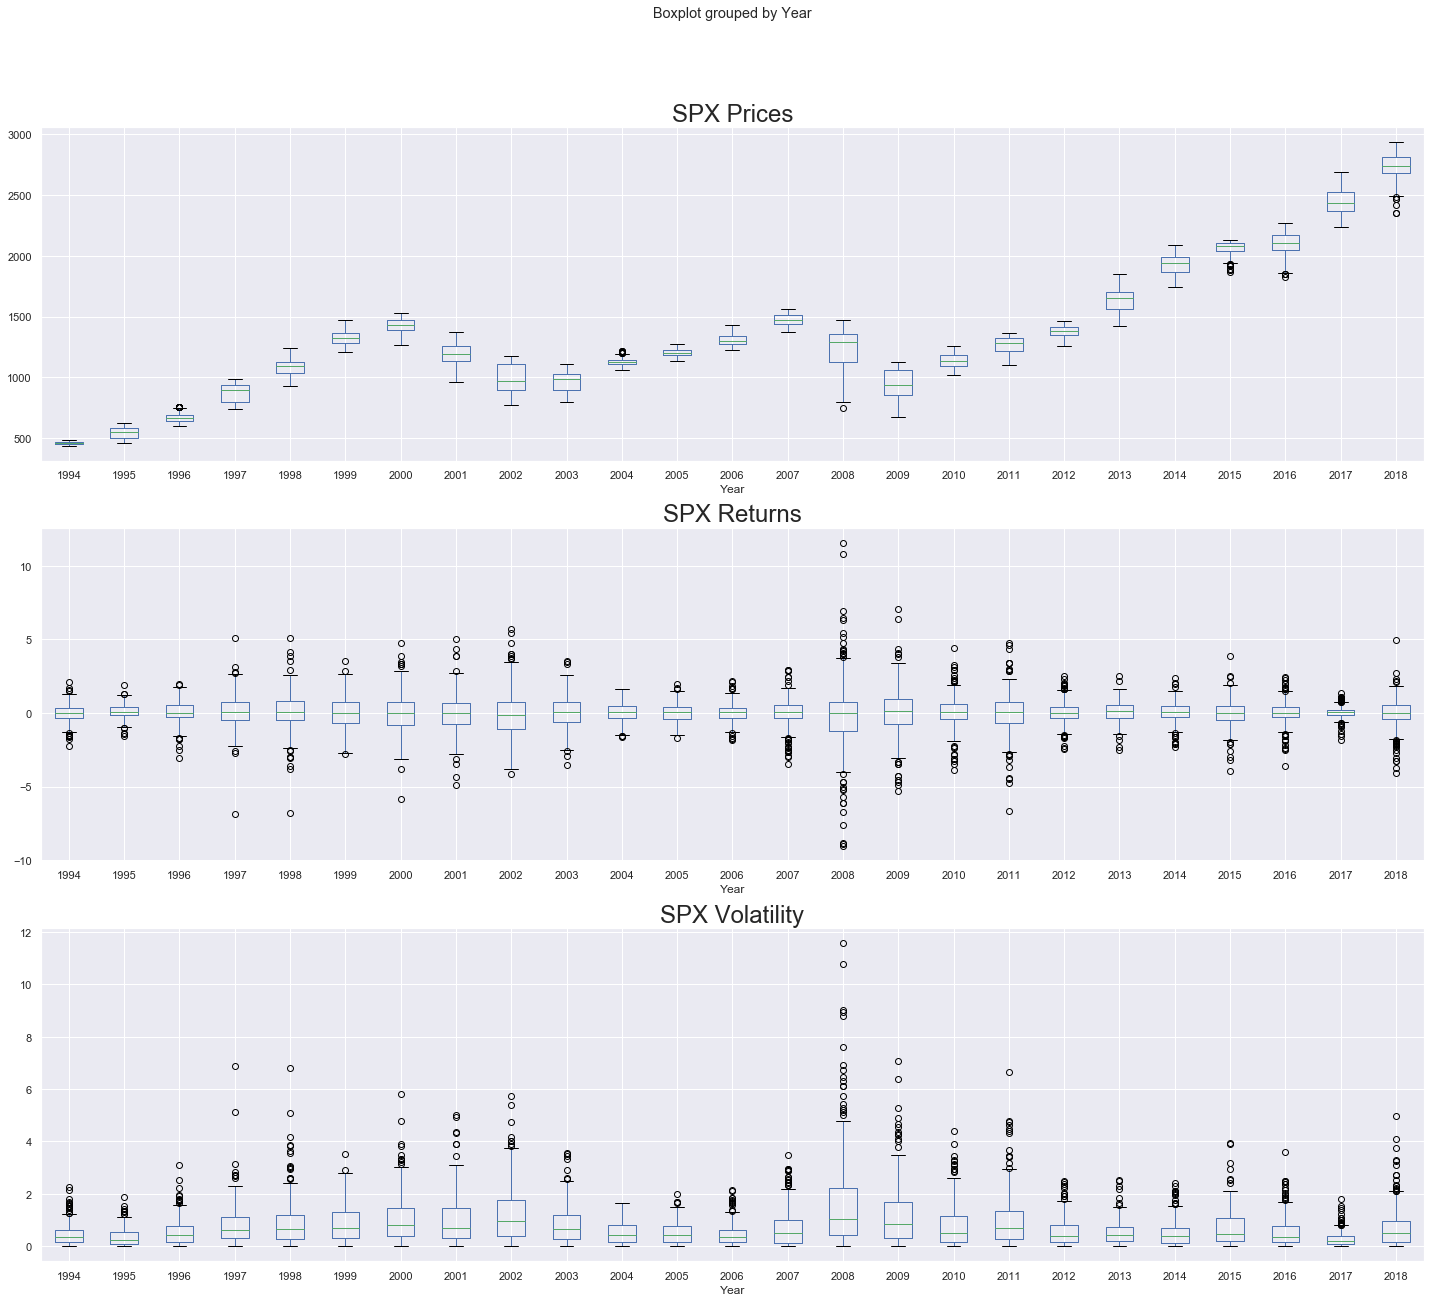

In [15]:
plt.rcParams["figure.figsize"] = 24, 21

fig, axes = plt.subplots(3, 1)

train_df.boxplot(by ='Year', column =['spx'], ax = axes[0])
axes[0].set_title("SPX Prices", size = 24)

train_df.boxplot(by ='Year', column =['spx_ret'], ax = axes[1])
axes[1].set_title("SPX Returns", size = 24)

train_df.boxplot(by ='Year', column =['spx_vol'], ax = axes[2])
axes[2].set_title("SPX Volatility", size = 24)

plt.show()

- The above plots show that SPX prices have a generally upward trend apart from a few dips experienced in early 2000s and near the years of 2008.
- The returns seem fairly steady over the years, but with some major fluctuations during the periods mentioned above.
- Similar pattern is observed in volatility plot as well.

## Distribution of Data

In this section, the distribution of the data is shwon using histograms and density plots.

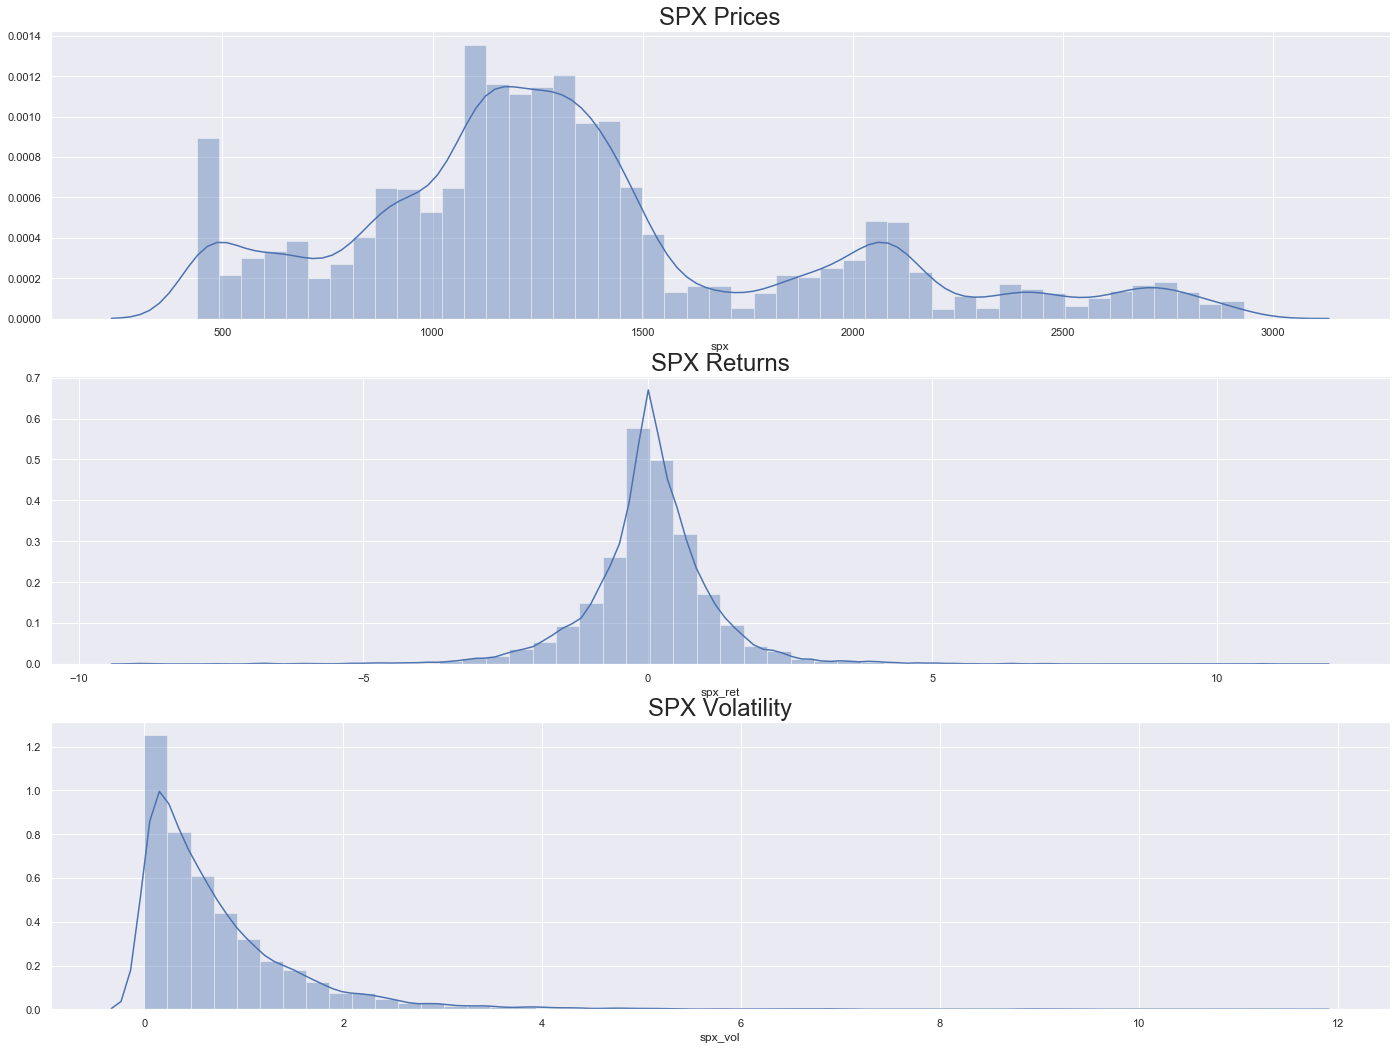

In [16]:
plt.rcParams["figure.figsize"] = 24, 18

fig, axes = plt.subplots(3, 1)

sns.distplot(train_df.spx, ax = axes[0])
sns.distplot(train_df.spx_ret, ax = axes[1])
sns.distplot(train_df.spx_vol, ax = axes[2])

axes[0].set_title("SPX Prices", size = 24)
axes[1].set_title("SPX Returns", size = 24)
axes[2].set_title("SPX Volatility", size = 24)

plt.show()

- SPX Prices are distributed in a seemingly normal distribution with unexpected bulges in some price ranges.
- SPX Returns are perfectly normally distributed.
- SPX Volatility mostly consists of values in the 0-4 range.

## Data Decomposition

### Additive Decomposition

In this type of decomposition the data is broken down in the following form - 

$y_t = T_t + S_t + R_t$

where,
- $y_t$: Value at time interval $t$
- $T_t$: Trend at time interval $t$
- $S_t$: Seasonality at time interval $t$
- $R_t$: Residual at time interval $t$

Now let's decompose our data into these components to further understand their patterns.

- **SPX Prices**

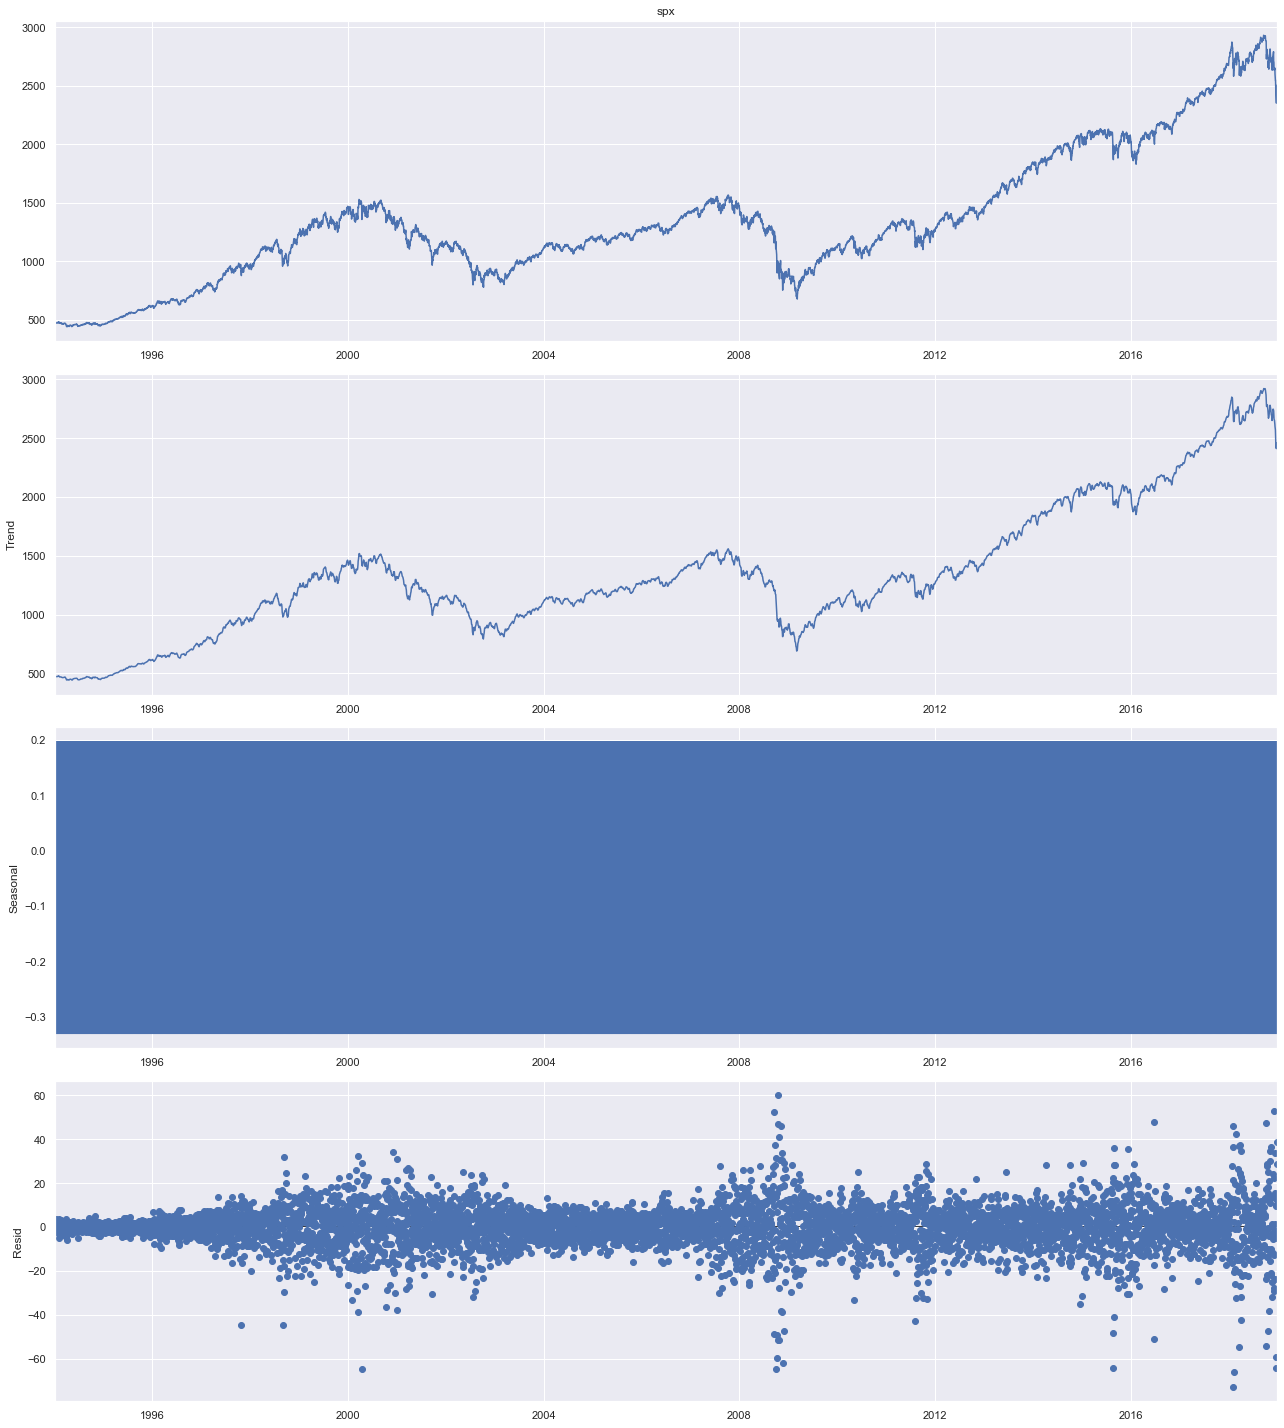

In [17]:
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(train_df.spx, model='additive')
result.plot()
plt.show()

Since the seasonal component is not clearly visible, let's examine it more closely.

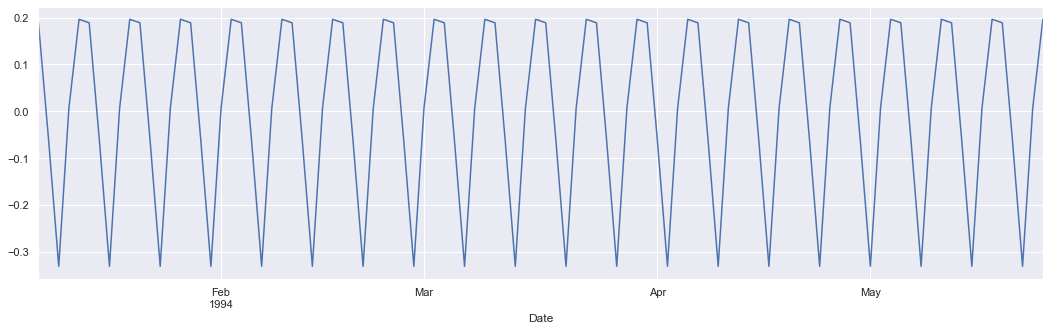

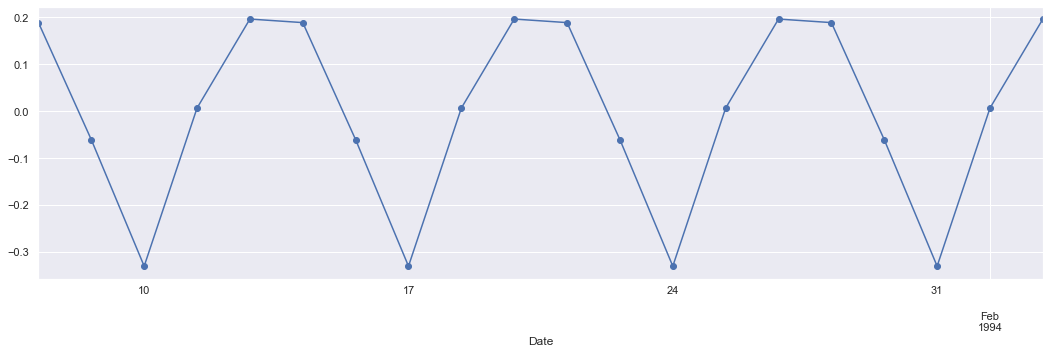

In [18]:
plt.rcParams["figure.figsize"] = 18, 5
result.seasonal[:100].plot()
plt.show()
result.seasonal[:20].plot(marker = "o")
plt.show()

- **SPX Returns**

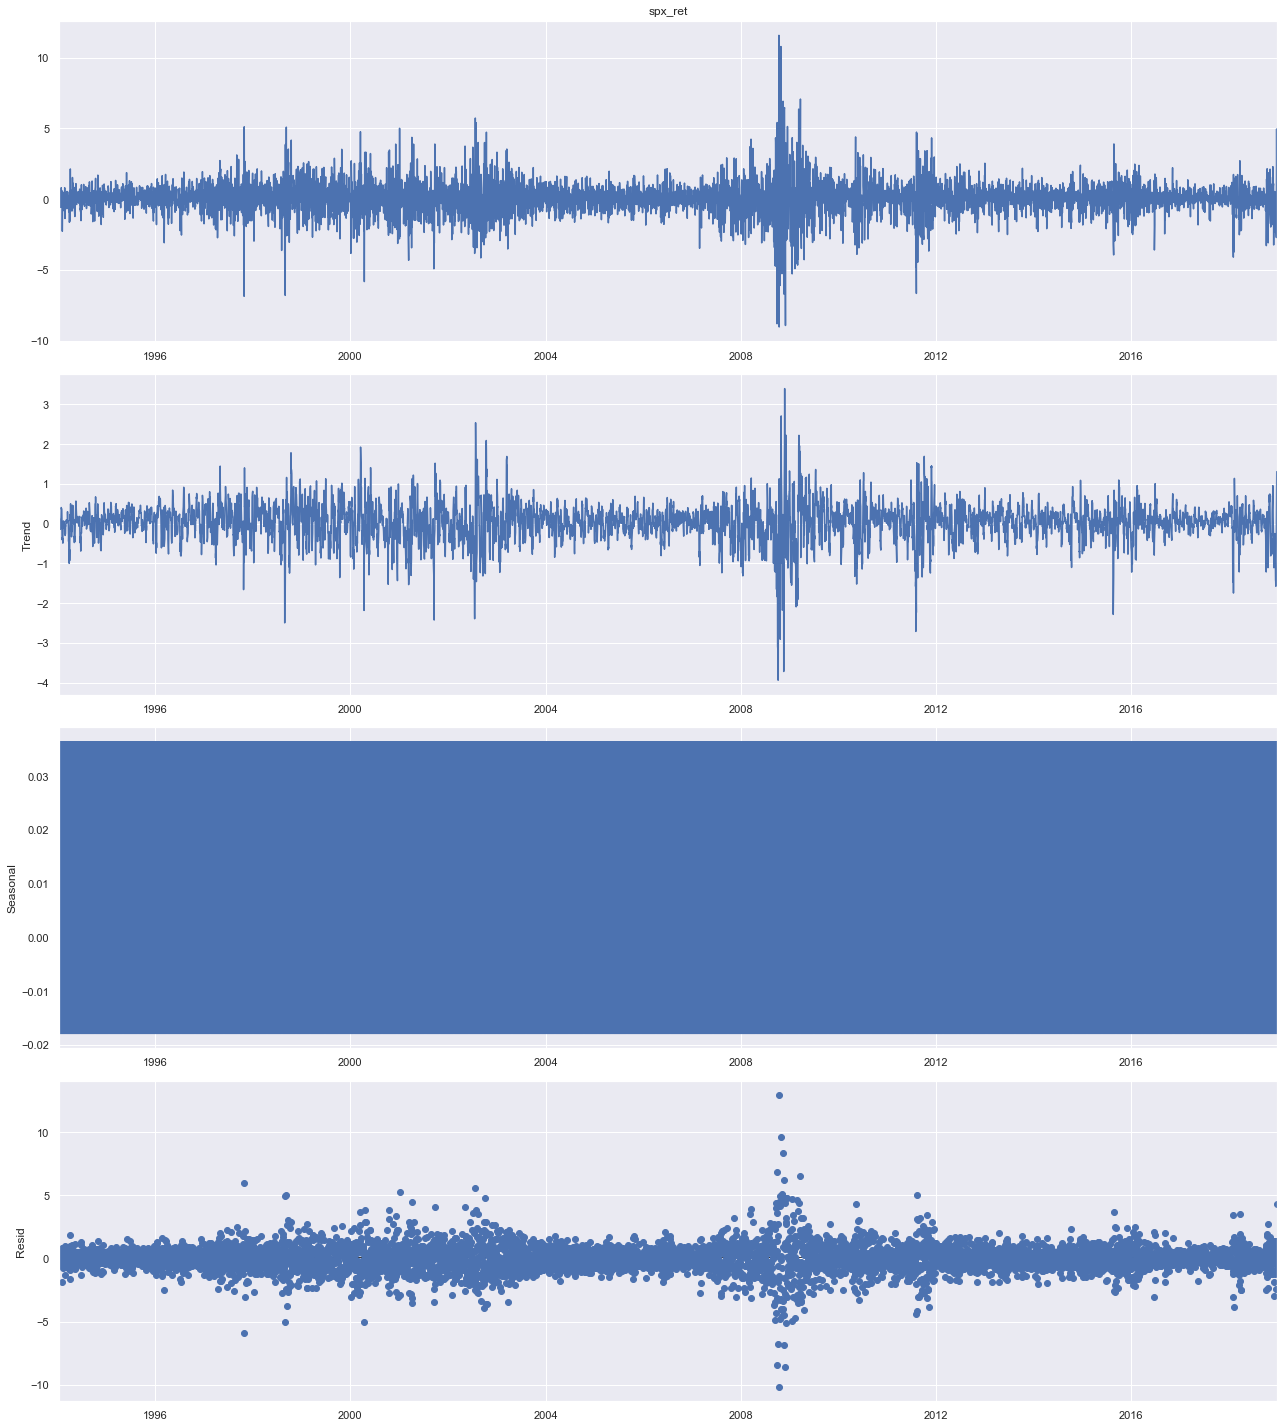

In [19]:
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(train_df.spx_ret[1:], model='additive')
result.plot()
plt.show()

Since the seasonal component is not clearly visible, let's examine it more closely.

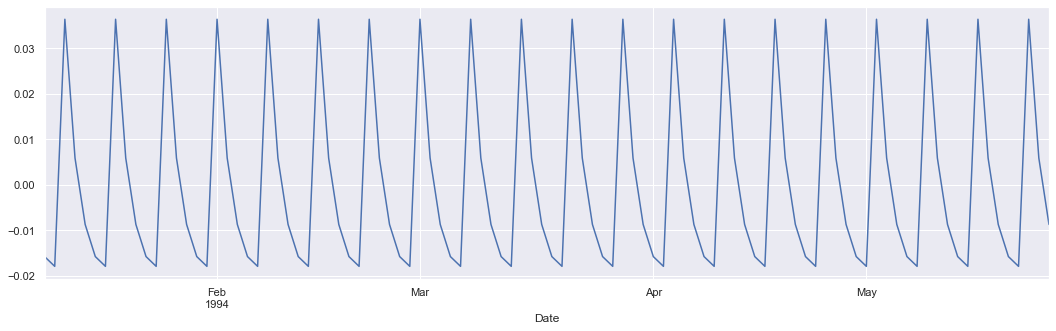

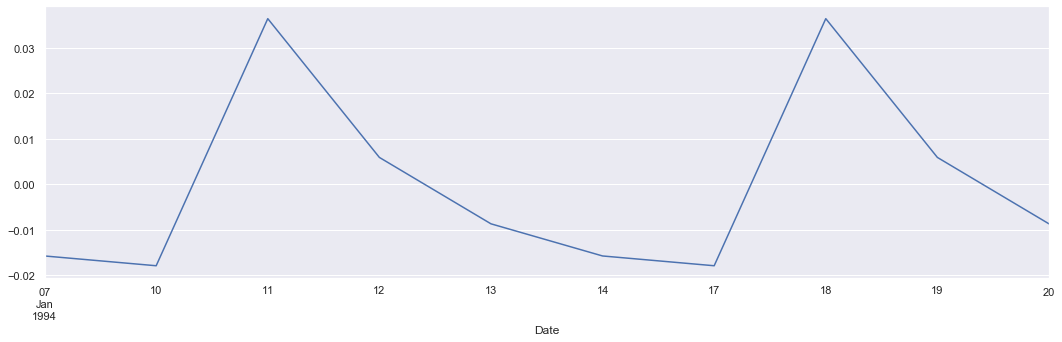

In [20]:
plt.rcParams["figure.figsize"] = 18, 5
result.seasonal[:100].plot()
plt.show()
result.seasonal[:10].plot()
plt.show()

- **SPX Volatility**

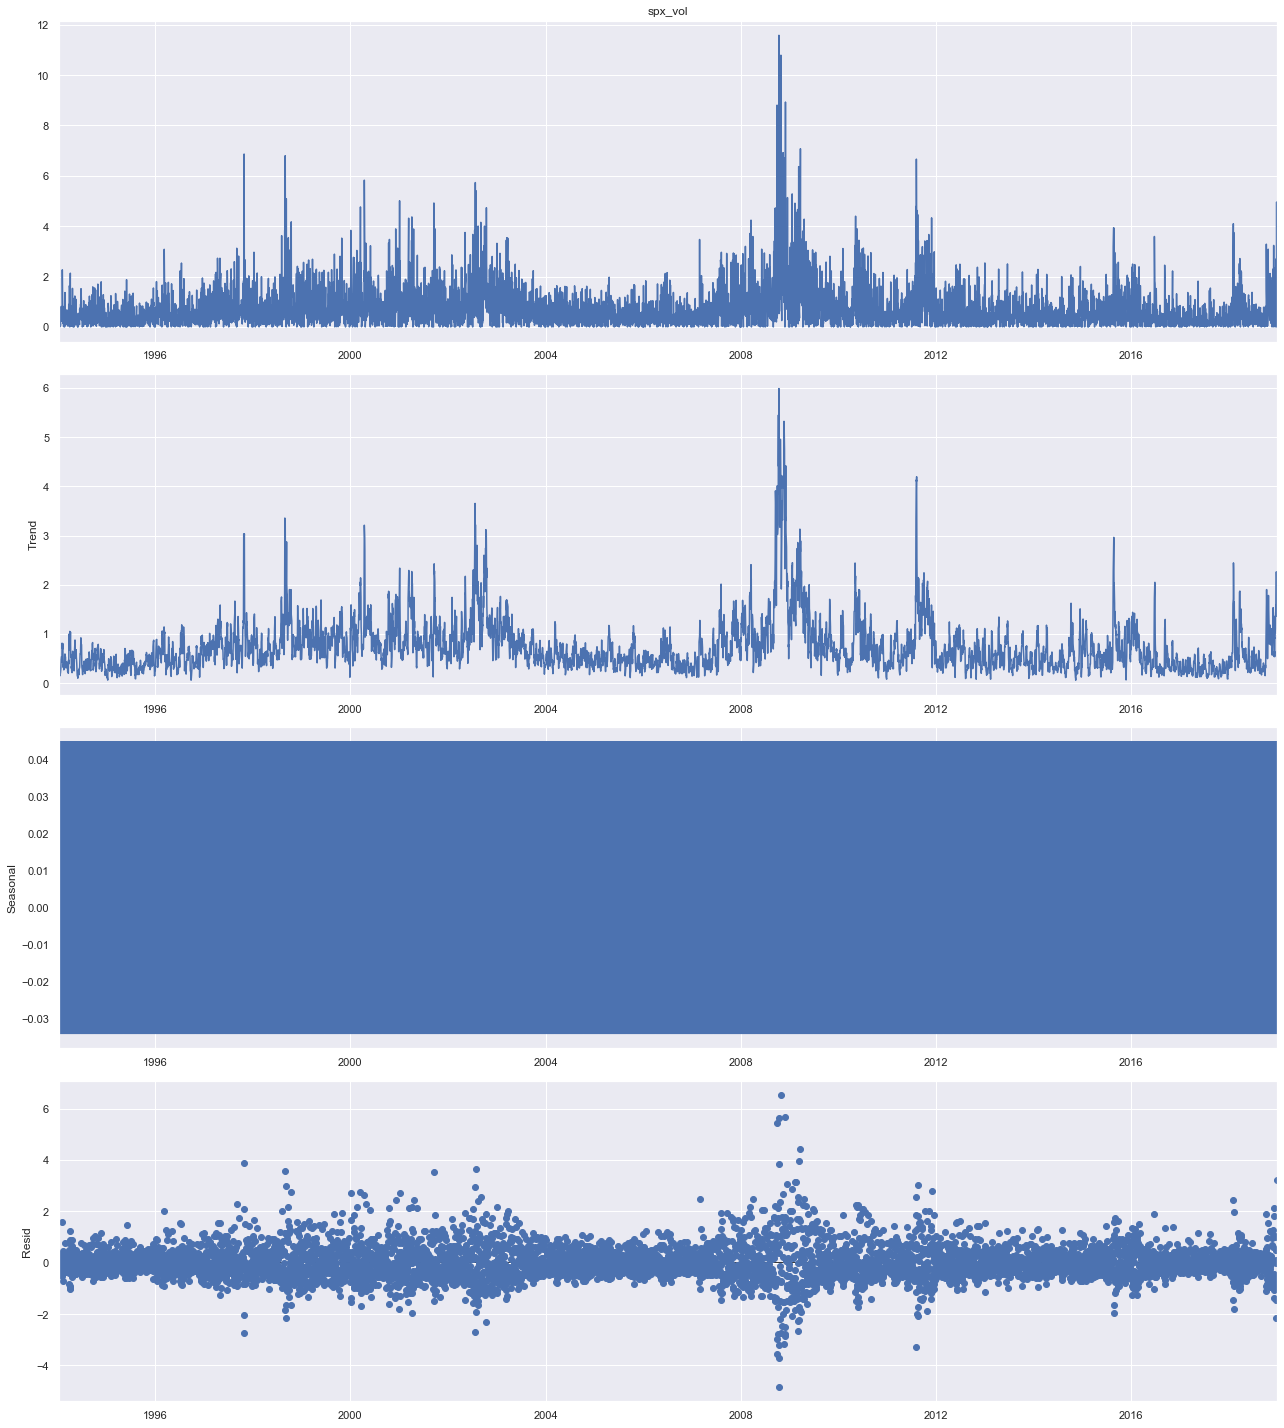

In [21]:
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(train_df.spx_vol[1:], model='additive')
result.plot()
plt.show()

Since the seasonal component is not clearly visible, let's examine it more closely.

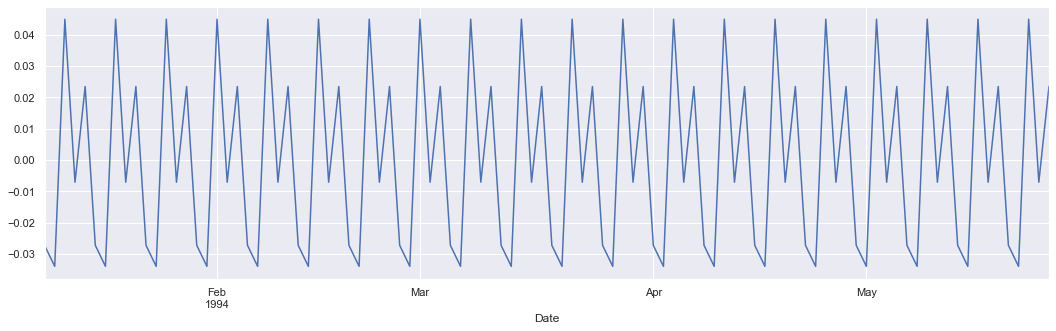

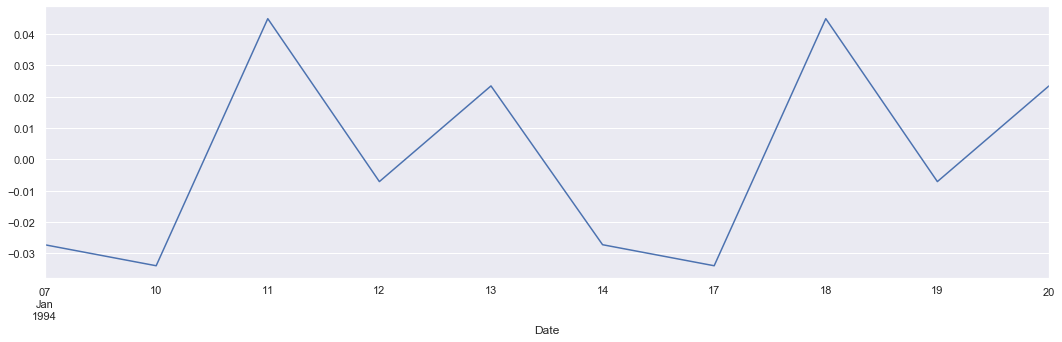

In [22]:
plt.rcParams["figure.figsize"] = 18, 5
result.seasonal[:100].plot()
plt.show()
result.seasonal[:10].plot()
plt.show()

The above decomposition plots reveal that the data does have a seasonal patterns in all 3 cases (Prices, Returns, and Volatility). The pattern repeats every week (business week - **5 days/week**).

### Multiplicative Decomposition

In this type of decomposition the data is broken down in the following form - 

$y_t = T_t * S_t * R_t$

where,
- $y_t$: Value at time interval $t$
- $T_t$: Trend at time interval $t$
- $S_t$: Seasonality at time interval $t$
- $R_t$: Residual at time interval $t$

Now let's decompose our data into these components to further understand their patterns.

- **SPX Prices**

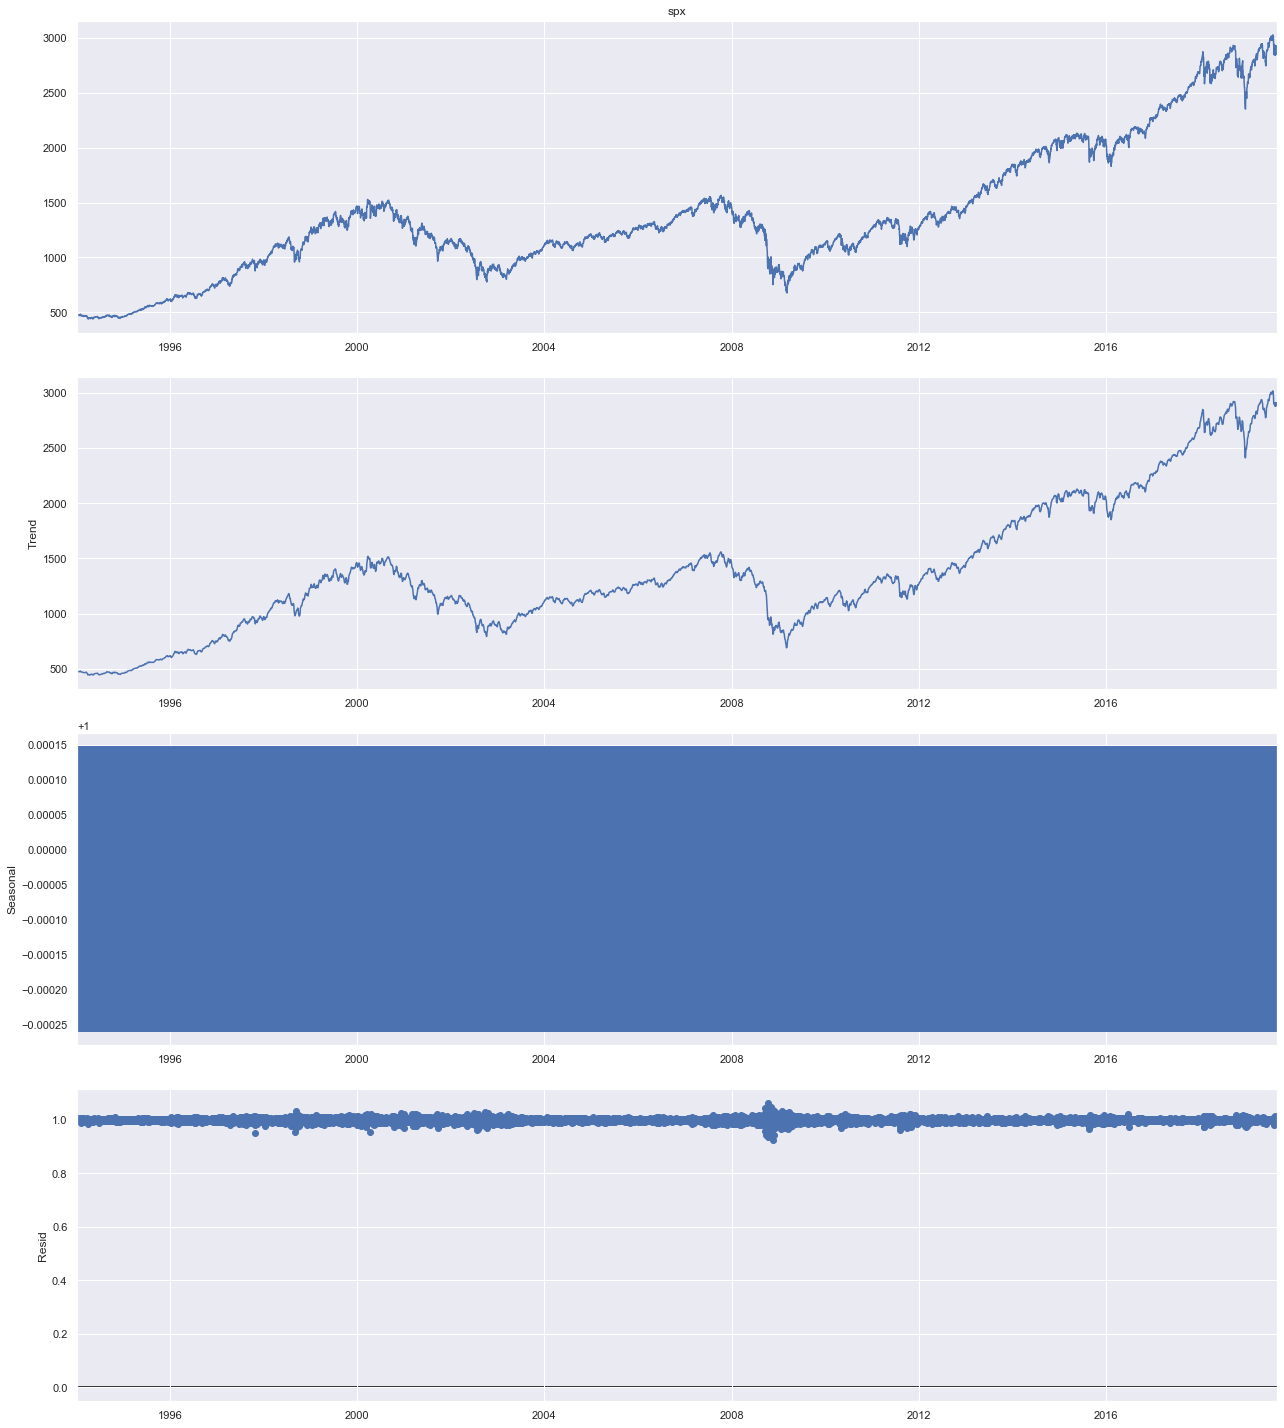

In [23]:
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data.spx, model='multiplicative')
result.plot()
plt.show()

Since the seasonal component is not clearly visible, let's examine it more closely.

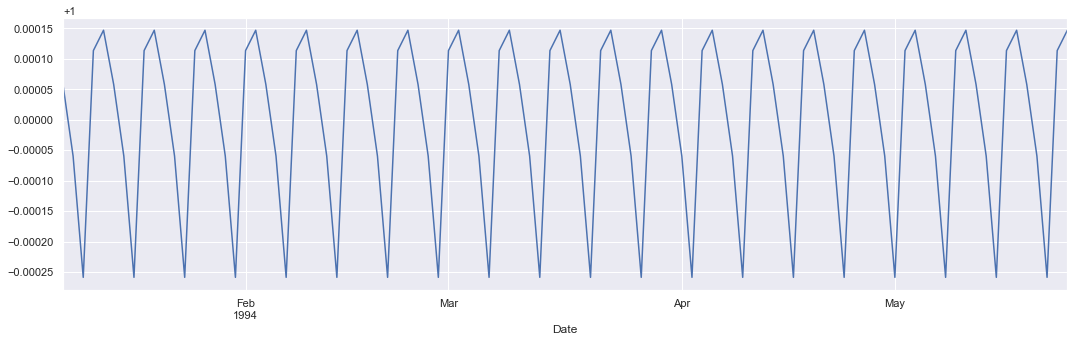

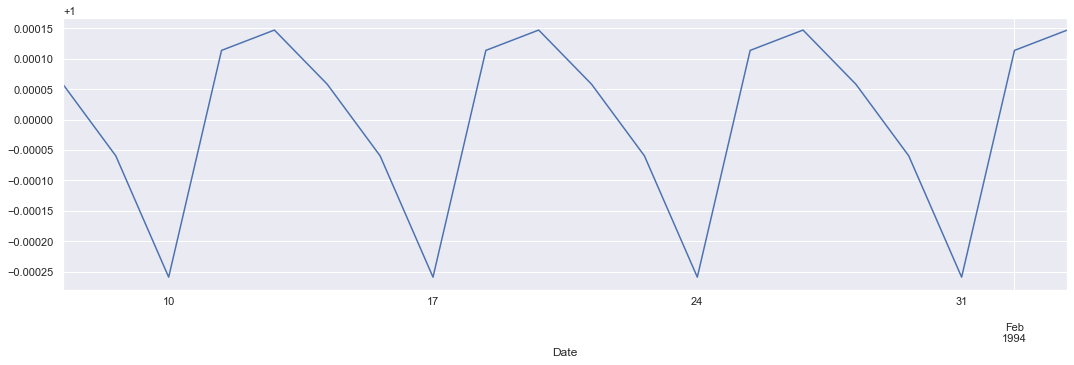

In [24]:
plt.rcParams["figure.figsize"] = 18, 5
result.seasonal[:100].plot()
plt.show()
result.seasonal[:20].plot()
plt.show()

Multiplicative Decomposition also reveals a similar seasonal pattern as Additive Decomposition.

- **SPX Returns**: In this case, the multiplicative decomposition will result in the following error - ***Multiplicative seasonality is not appropriate for zero and negative values***. Feel free to uncomment the following cell and try it out for yourself.

In [25]:
# plt.rcParams["figure.figsize"] = 18, 20
# result = seasonal_decompose(data.spx_ret[1:], model='multiplicative')
# result.plot()
# plt.show()

- **SPX Volatility**: In this case, the multiplicative decomposition will result in the following error - ***Multiplicative seasonality is not appropriate for zero and negative values***. Feel free to uncomment the following cell and try it out for yourself.

In [26]:
# plt.rcParams["figure.figsize"] = 18, 20
# result = seasonal_decompose(data.spx_vol[1:], model='multiplicative')
# result.plot()
# plt.show()

The above decomposition plots also reveal that the data does not have any seasonal patterns.

## Smoothing (Moving Average)

In this section, the underlying trends in the data is explored using a moving average technique. In this a window size is chosen and the average of all datapoints in this window size is taken. This reduces the effects of noise and produces a smoother curve.

Let's analyse all three types of SPX (prices, returns, volatility) data that we have using this technique. 

- **SPX Prices**

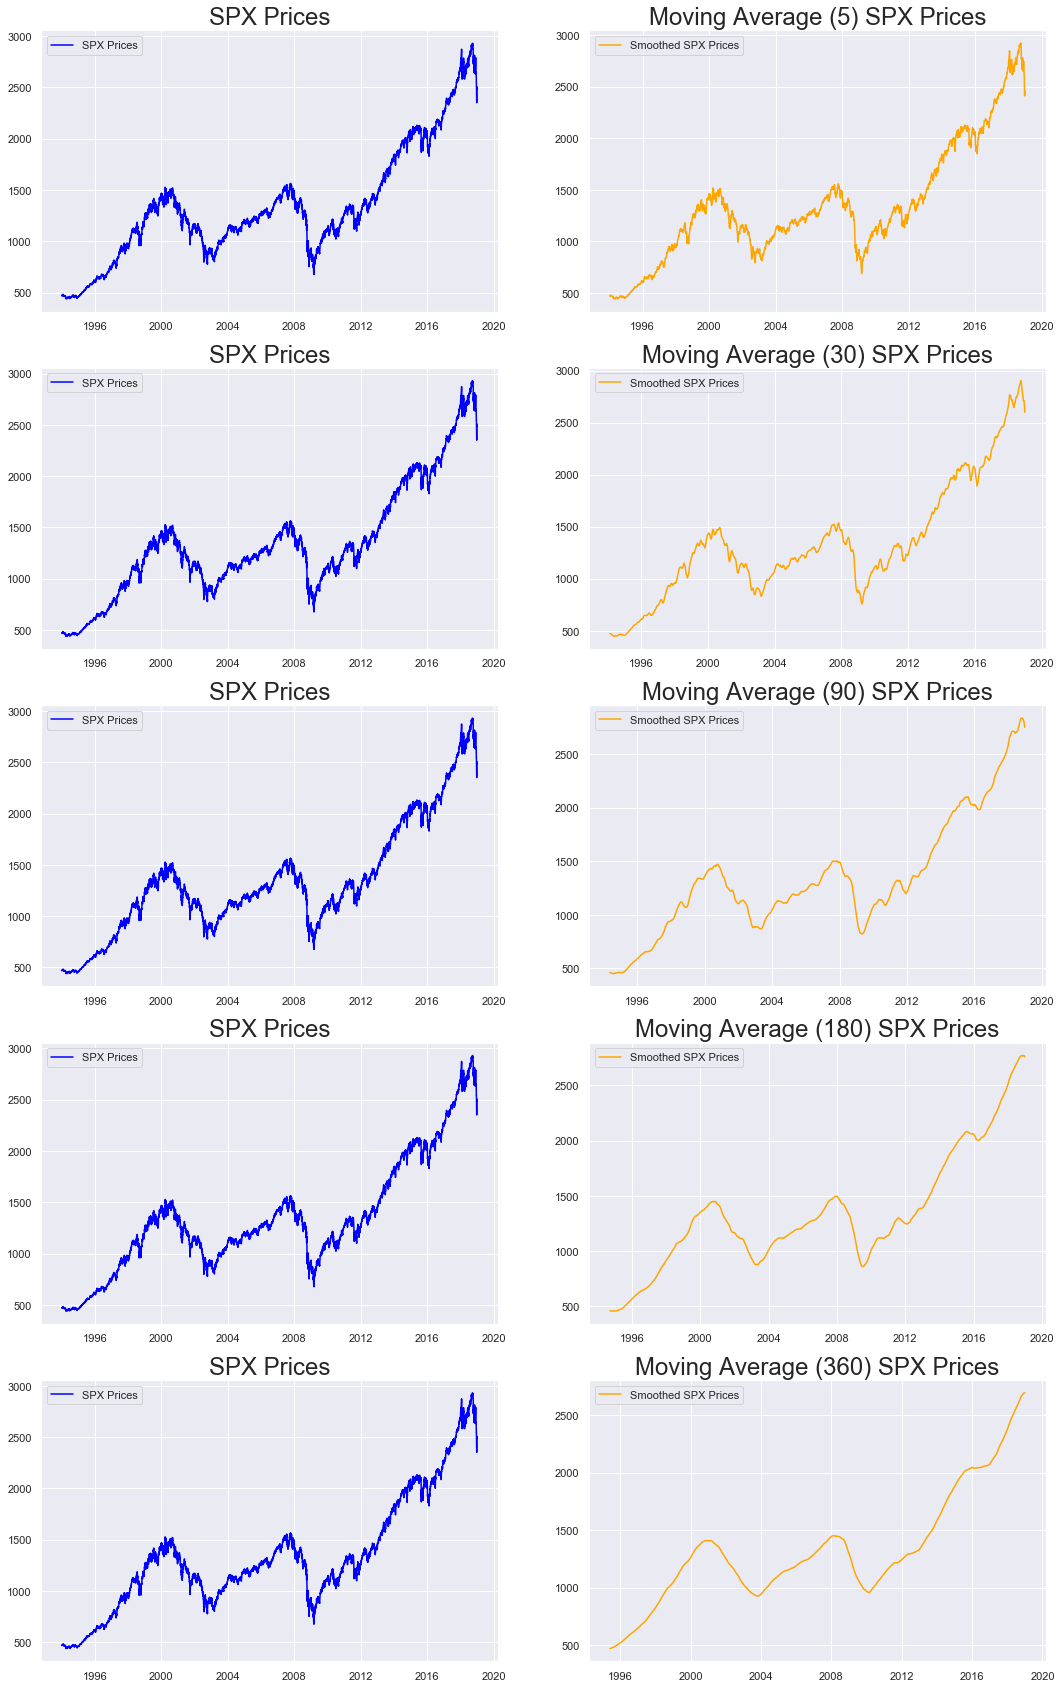

In [27]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

# Plots for Weekly average (Window = 5) 
ax[0, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[0, 0].set_title("SPX Prices", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.spx.rolling(window=5).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[0, 1].set_title("Moving Average (5) SPX Prices", size = 24)
ax[0, 1].legend()


# Plots for Monthly average (Window = 30)
ax[1, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[1, 0].set_title("SPX Prices", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.spx.rolling(window=30).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[1, 1].set_title("Moving Average (30) SPX Prices", size = 24)
ax[1, 1].legend()


# Plots for Quarterly average (Window = 5)
ax[2, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[2, 0].set_title("SPX Prices", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(train_df.spx.rolling(window=90).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[2, 1].set_title("Moving Average (90) SPX Prices", size = 24)
ax[2, 1].legend()


# Plots for Half-yearly average (Window = 180)
ax[3, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[3, 0].set_title("SPX Prices", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(train_df.spx.rolling(window=180).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[3, 1].set_title("Moving Average (180) SPX Prices", size = 24)
ax[3, 1].legend()


# Plots for Yearly average (Window = 360)
ax[4, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[4, 0].set_title("SPX Prices", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(train_df.spx.rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[4, 1].set_title("Moving Average (360) SPX Prices", size = 24)
ax[4, 1].legend()

plt.show()

- **SPX Returns**

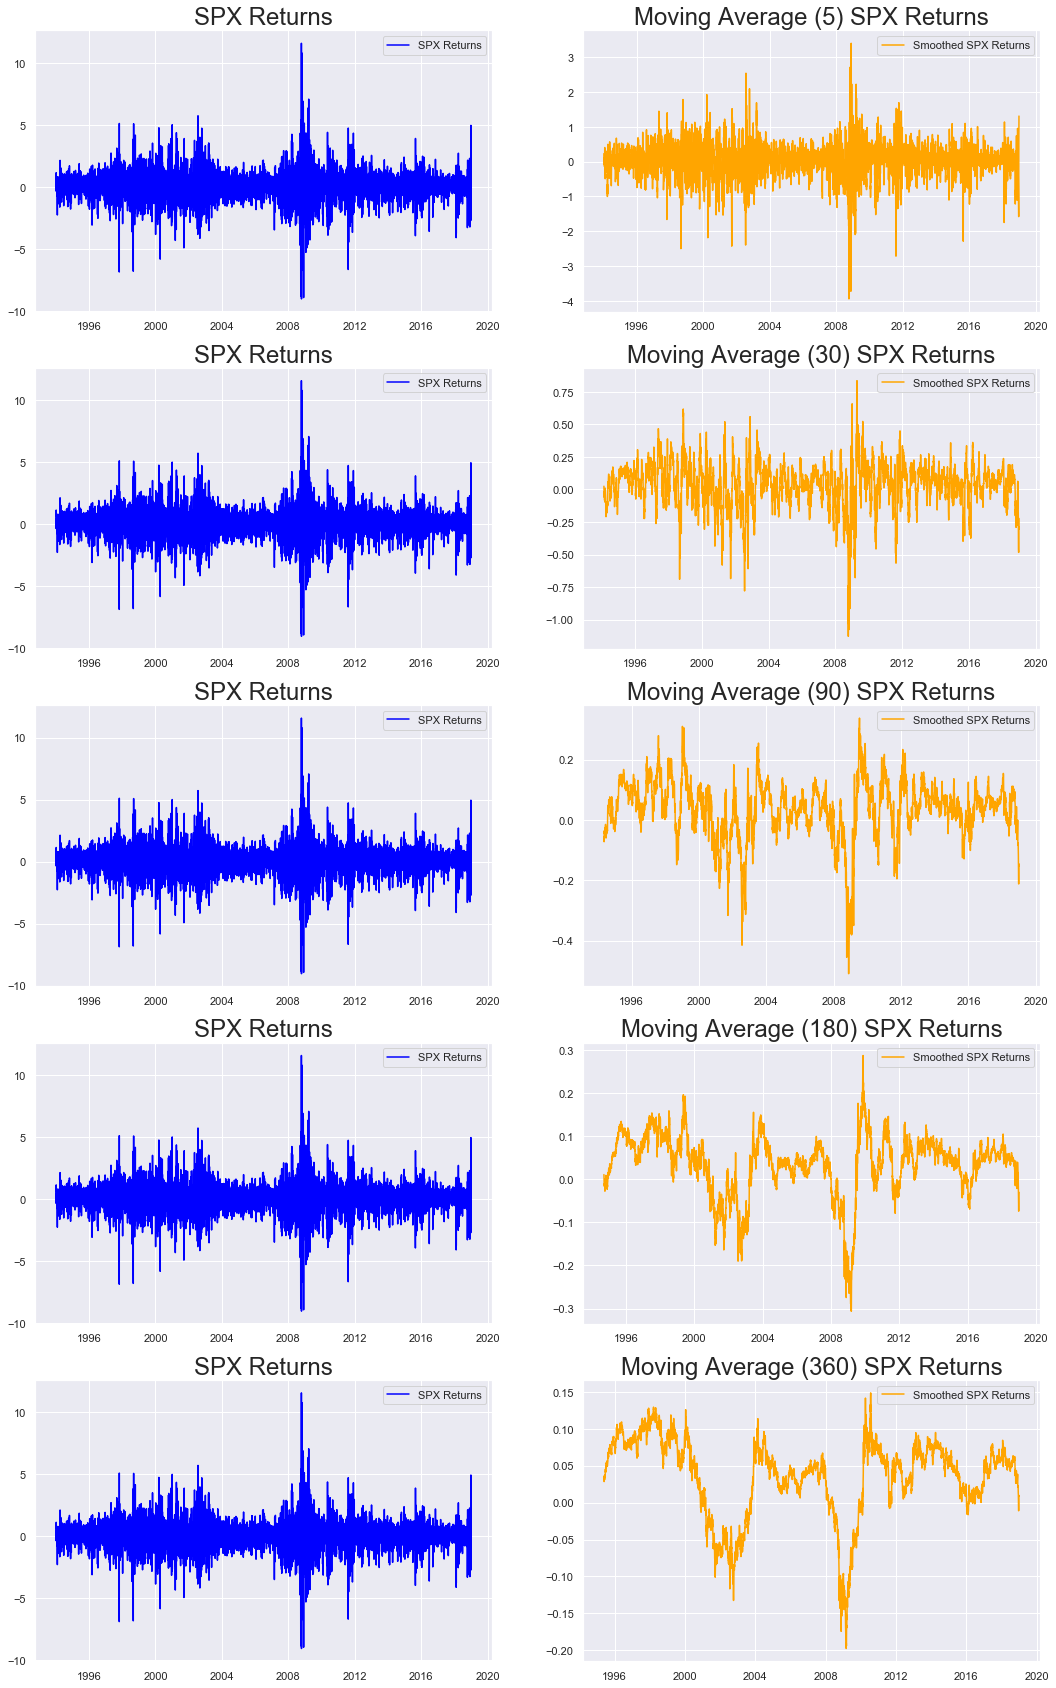

In [28]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

# Plots for Weekly average (Window = 5) 
ax[0, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[0, 0].set_title("SPX Returns", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.spx_ret[1:].rolling(window=5).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[0, 1].set_title("Moving Average (5) SPX Returns", size = 24)
ax[0, 1].legend()


# Plots for Monthly average (Window = 30)
ax[1, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[1, 0].set_title("SPX Returns", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.spx_ret[1:].rolling(window=30).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[1, 1].set_title("Moving Average (30) SPX Returns", size = 24)
ax[1, 1].legend()


# Plots for Quarterly average (Window = 5)
ax[2, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[2, 0].set_title("SPX Returns", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(train_df.spx_ret[1:].rolling(window=90).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[2, 1].set_title("Moving Average (90) SPX Returns", size = 24)
ax[2, 1].legend()


# Plots for Half-yearly average (Window = 180)
ax[3, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[3, 0].set_title("SPX Returns", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(train_df.spx_ret[1:].rolling(window=180).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[3, 1].set_title("Moving Average (180) SPX Returns", size = 24)
ax[3, 1].legend()


# Plots for Yearly average (Window = 360)
ax[4, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[4, 0].set_title("SPX Returns", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(train_df.spx_ret[1:].rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[4, 1].set_title("Moving Average (360) SPX Returns", size = 24)
ax[4, 1].legend()

plt.show()

- **SPX Volatility**

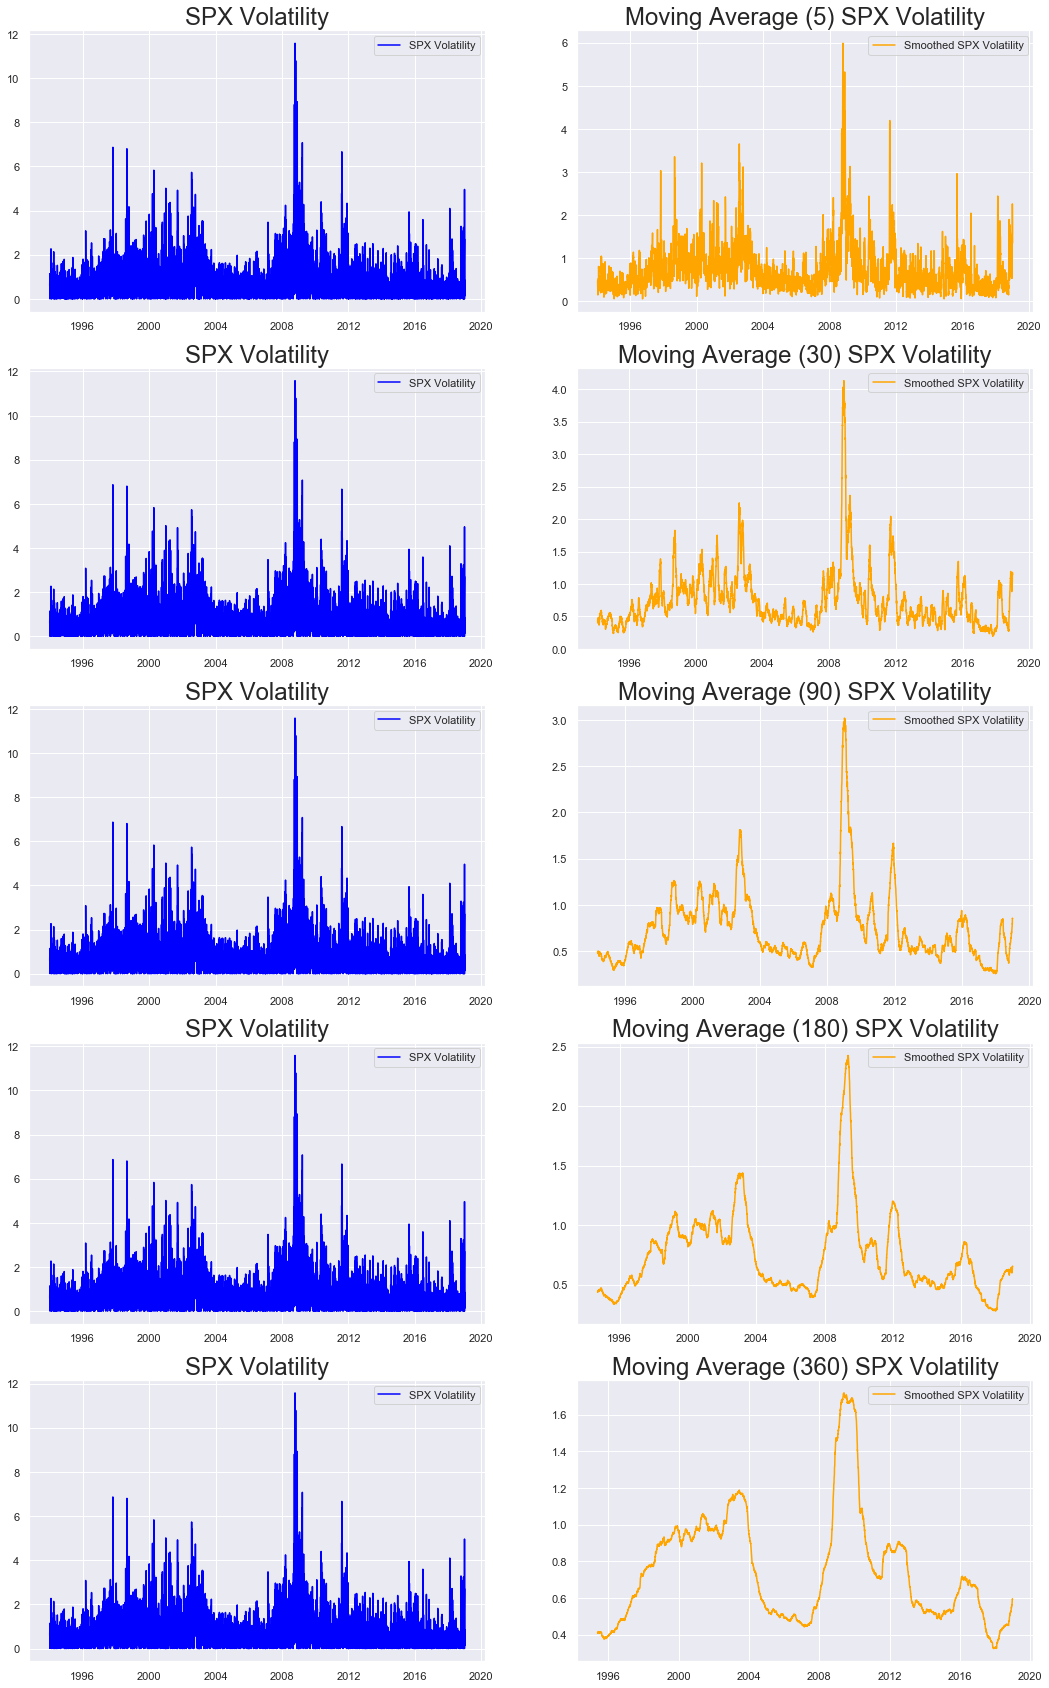

In [29]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

# Plots for Weekly average (Window = 5) 
ax[0, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[0, 0].set_title("SPX Volatility", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.spx_vol[1:].rolling(window=5).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[0, 1].set_title("Moving Average (5) SPX Volatility", size = 24)
ax[0, 1].legend()


# Plots for Monthly average (Window = 30)
ax[1, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[1, 0].set_title("SPX Volatility", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.spx_vol[1:].rolling(window=30).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[1, 1].set_title("Moving Average (30) SPX Volatility", size = 24)
ax[1, 1].legend()


# Plots for Quarterly average (Window = 5)
ax[2, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[2, 0].set_title("SPX Volatility", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(train_df.spx_vol[1:].rolling(window=90).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[2, 1].set_title("Moving Average (90) SPX Volatility", size = 24)
ax[2, 1].legend()


# Plots for Half-yearly average (Window = 180)
ax[3, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[3, 0].set_title("SPX Volatility", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(train_df.spx_vol[1:].rolling(window=180).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[3, 1].set_title("Moving Average (180) SPX Volatility", size = 24)
ax[3, 1].legend()


# Plots for Yearly average (Window = 360)
ax[4, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Volatility")
ax[4, 0].set_title("SPX Volatility", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(train_df.spx_vol[1:].rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[4, 1].set_title("Moving Average (360) SPX Volatility", size = 24)
ax[4, 1].legend()

plt.show()

The above plots show the underlying trend in the data by taking a moving average of the data with a different window each time. As the window size increases the curves become much more smoother and the trend is better revealed.

Using this technique, it is apparent that in which time intervals, the market was in general giving strong returns, when the market was relatively stable, and what has been the overall trend in the market in different time intervals. 

## Correlation Plots

In these plots, we examine the relationship that the data has with its lagged versions using the following Correlation plots. This helps us in figuring out possible patterns/trends in the data that can then be used as features in forecasting models.

### ACF

ACF Plots for the first **40 lags** will show how correlated the data is when compared to data upto a month before.

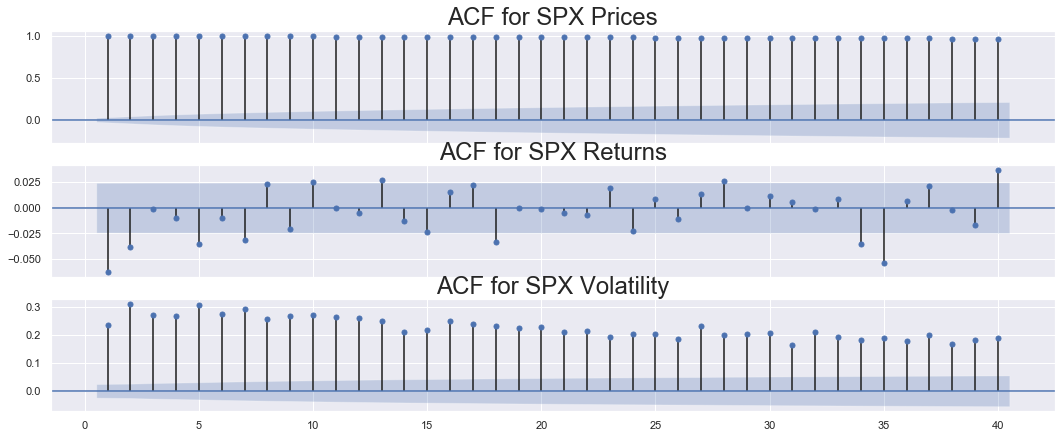

In [30]:
plt.rcParams["figure.figsize"] = 18, 7

fig, axes = plt.subplots(3, 1, sharex = True)

sgt.plot_acf(train_df.spx, zero = False, lags = 40, ax = axes[0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 40, ax = axes[1])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 40, ax = axes[2])

axes[0].set_title("ACF for SPX Prices", size = 24)
axes[1].set_title("ACF for SPX Returns", size = 24)
axes[2].set_title("ACF for SPX Volatility", size = 24)

plt.show()

ACF Plots for the first **90 lags** will show how correlated the data is when compared to data upto a quarter year before.

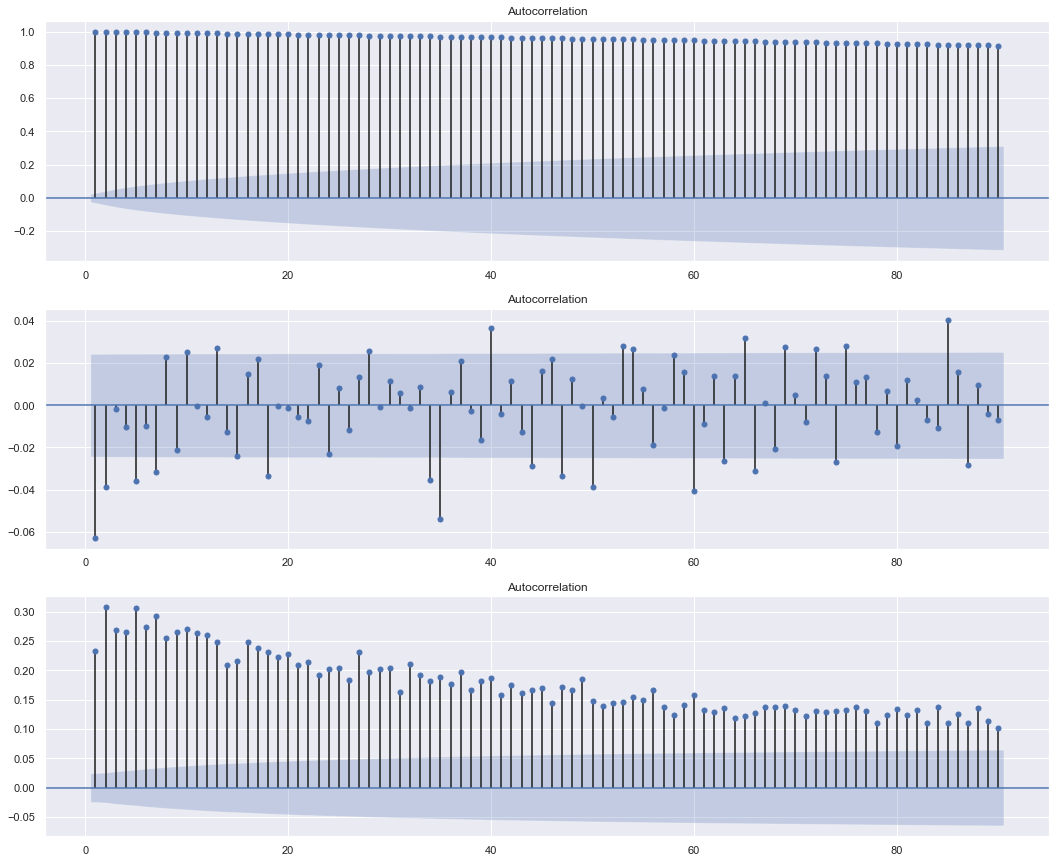

In [31]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_acf(train_df.spx, zero = False, lags = 90, ax = axes[0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 90, ax = axes[1])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 90, ax = axes[2])

plt.show()

ACF Plots for the first **180 lags** will show how correlated the data is when compared to data upto half a year before.

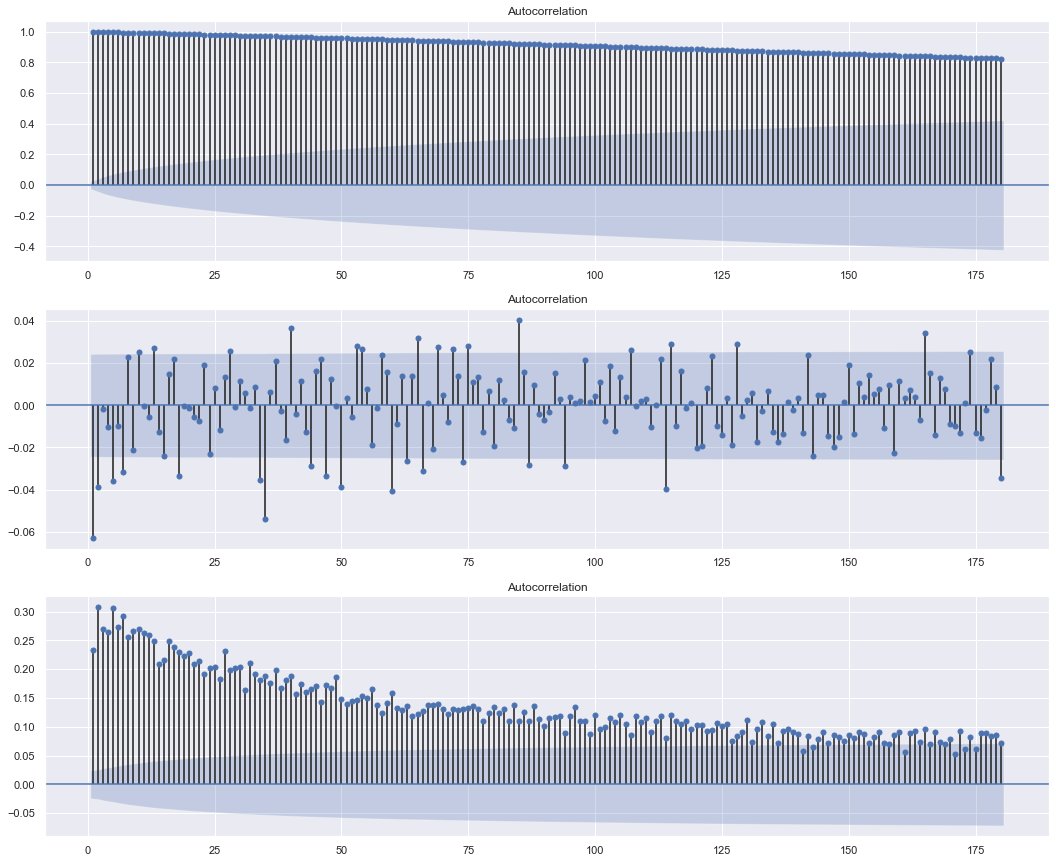

In [32]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_acf(train_df.spx, zero = False, lags = 180, ax = axes[0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 180, ax = axes[1])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 180, ax = axes[2])

plt.show()

ACF Plots for the first **360 lags** will show how correlated the data is when compared to data upto a year before.

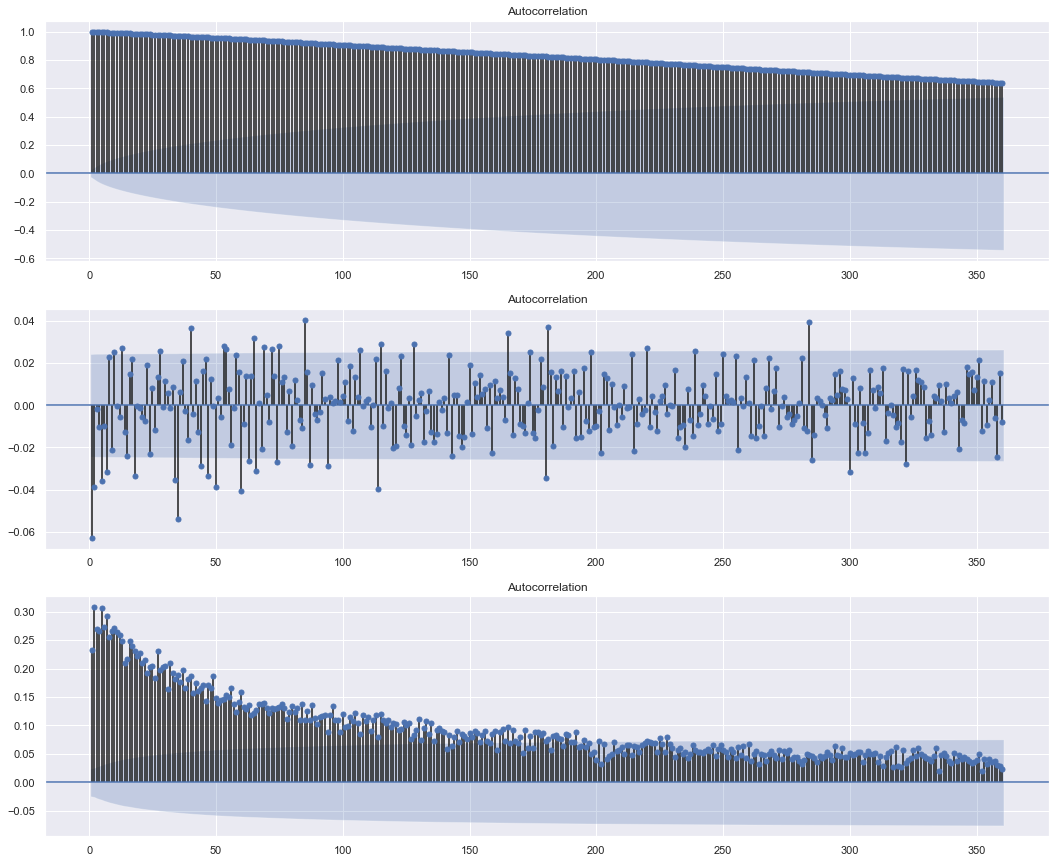

In [33]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_acf(train_df.spx, zero = False, lags = 360, ax = axes[0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 360, ax = axes[1])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 360, ax = axes[2])

plt.show()

These plots show how the data is correlated with a lagged version of itself.
- Lagged SPX prices are strogly correlated. The correlation is persistent even after a year.
- Lagged SPX Returns are correlated initially. Then the correlation spikes up only in certain pockets which may indicate that the data shows some correlation with data that is observed some (meaningful) time previously. Such as, a week, a month, a quarter, a half year or a full year. The reason for the spikes to not be present in lags that are at multiples of 30 is - the months in this dataset do not have 30 days as we are storing values only for business days (5 days a week).
- Lagged versions of SPX Volatility are, like lagged SPX prices, strogly correlated for a long initial period. Then the correlation reduces and spikes up again at a later stage. This stage may also correspond to some lags that are at a meaningful time duration apart from the dataset (like in the case of lagged SPX Returns).

### PACF

PACF Plots for the first **40 lags** will show how correlated the data is when compared to data upto a month before.

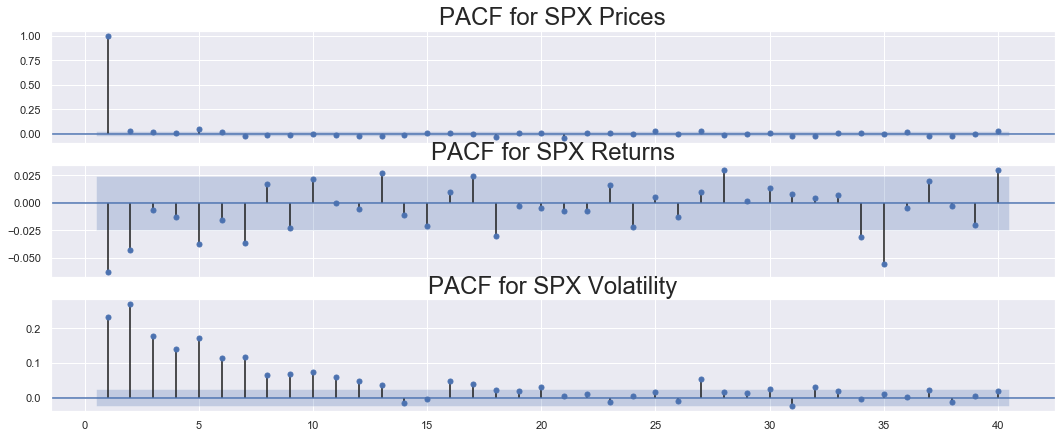

In [34]:
plt.rcParams["figure.figsize"] = 18, 7

fig, axes = plt.subplots(3, 1, sharex = True)

sgt.plot_pacf(train_df.spx, zero = False, lags = 40, ax = axes[0])
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 40, ax = axes[1])
sgt.plot_pacf(train_df.spx_vol[1:], zero = False, lags = 40, ax = axes[2])

axes[0].set_title("PACF for SPX Prices", size = 24)
axes[1].set_title("PACF for SPX Returns", size = 24)
axes[2].set_title("PACF for SPX Volatility", size = 24)

plt.show()

PACF Plots for the first **90 lags** will show how correlated the data is when compared to data upto a quarter year before.

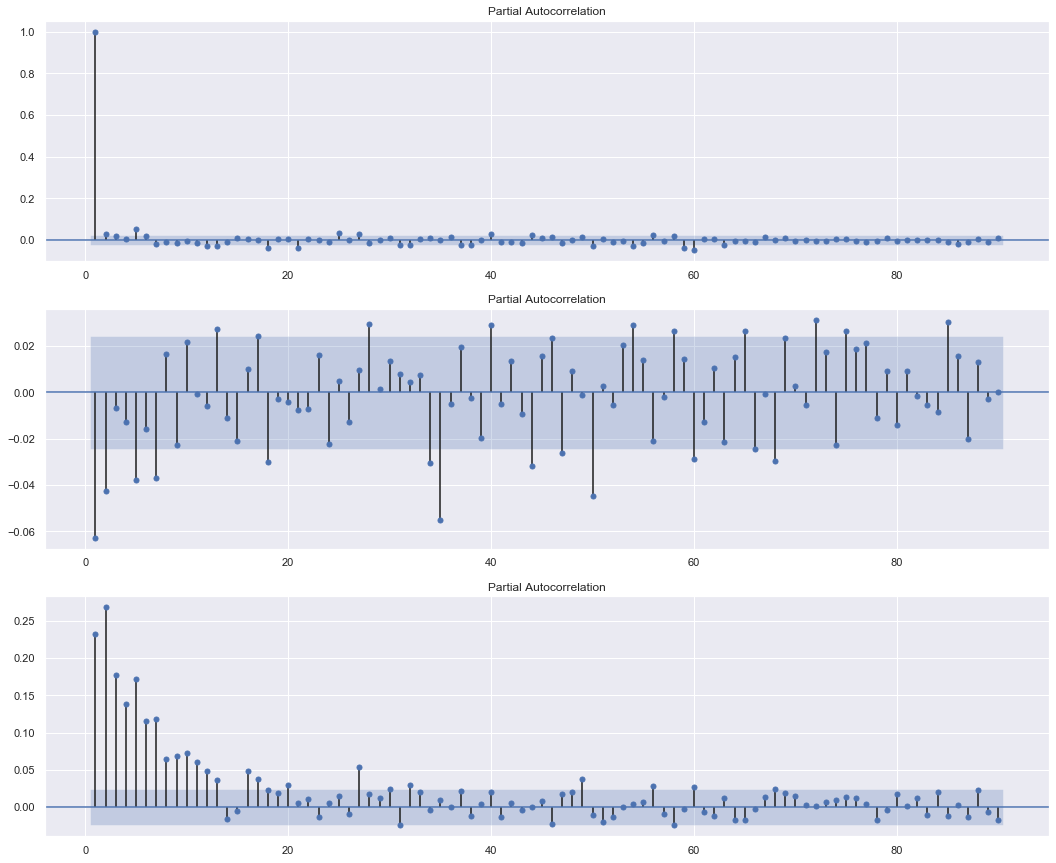

In [35]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_pacf(train_df.spx, zero = False, lags = 90, ax = axes[0])
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 90, ax = axes[1])
sgt.plot_pacf(train_df.spx_vol[1:], zero = False, lags = 90, ax = axes[2])

plt.show()

PACF Plots for the first **180 lags** will show how correlated the data is when compared to data upto half a year before.

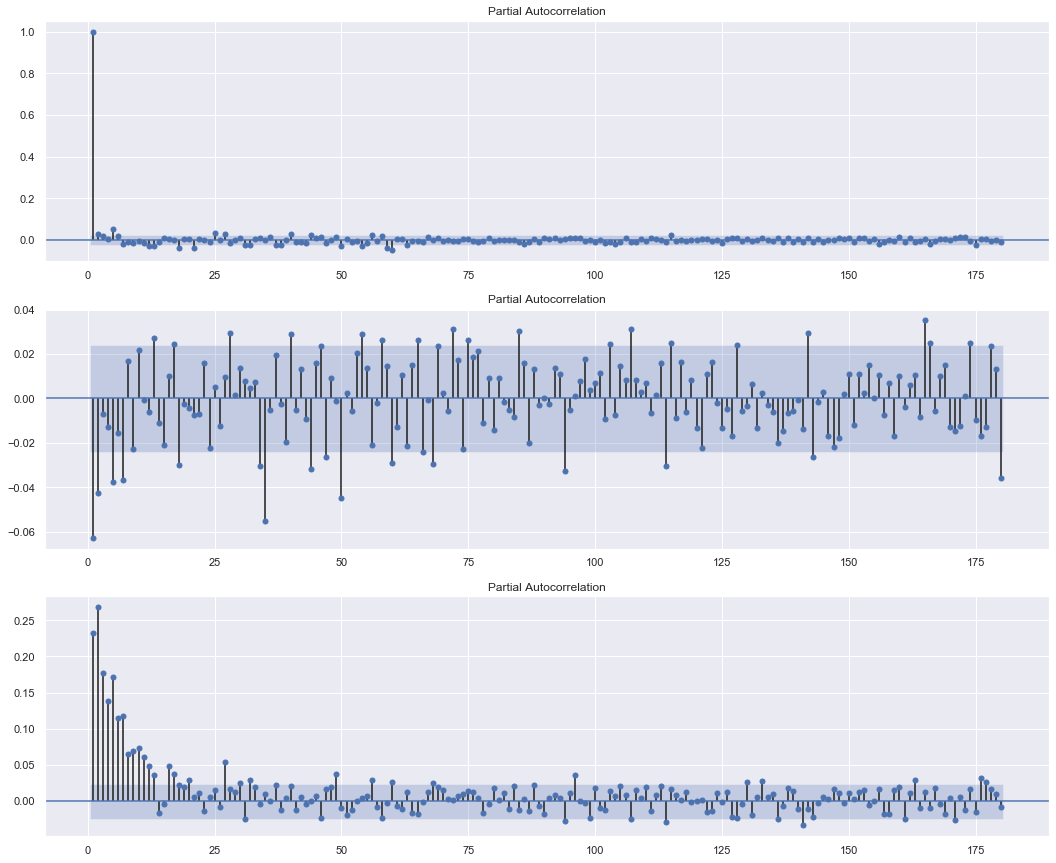

In [36]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_pacf(train_df.spx, zero = False, lags = 180, ax = axes[0])
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 180, ax = axes[1])
sgt.plot_pacf(train_df.spx_vol[1:], zero = False, lags = 180, ax = axes[2])

plt.show()

PACF Plots for the first **360 lags** will show how correlated the data is when compared to data upto a year before.

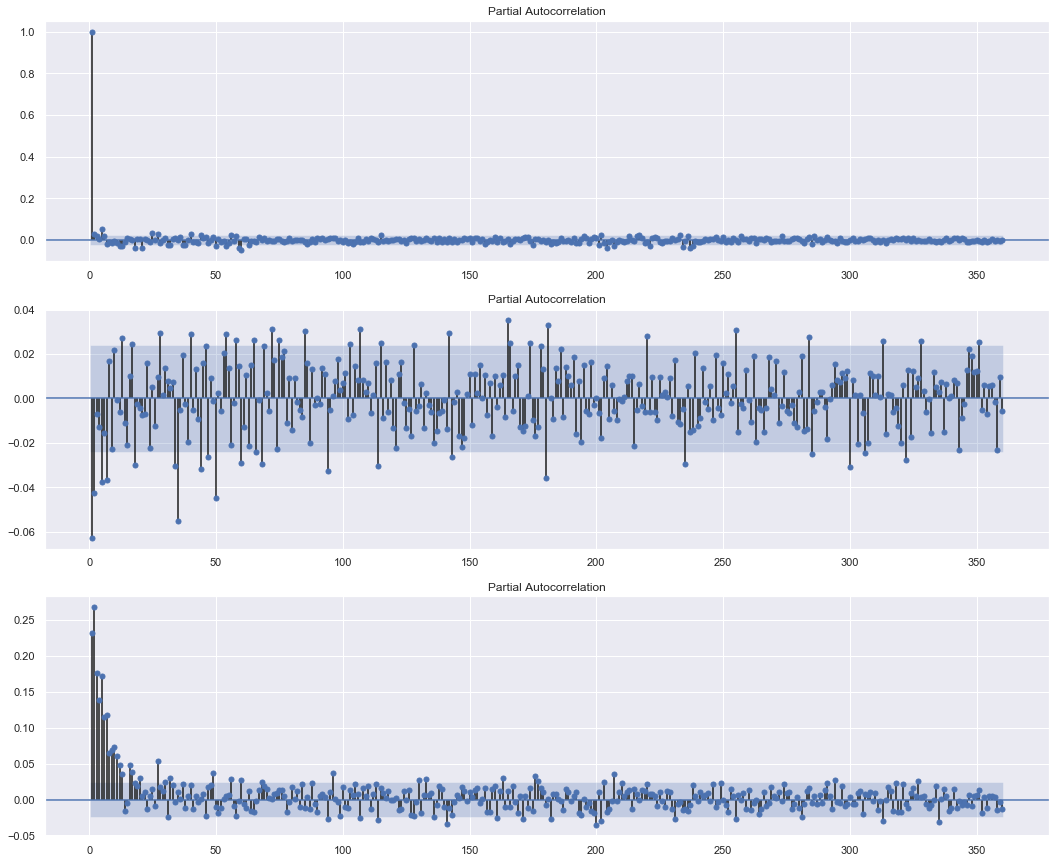

In [37]:
plt.rcParams["figure.figsize"] = 18, 15

fig, axes = plt.subplots(3, 1)

sgt.plot_pacf(train_df.spx, zero = False, lags = 360, ax = axes[0])
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 360, ax = axes[1])
sgt.plot_pacf(train_df.spx_vol[1:], zero = False, lags = 360, ax = axes[2])

plt.show()

These plots show how the data is correlated with a lagged version of itself.
- Unlike what the ACF plots suggested, Lagged SPX prices are strogly correlated for the first lag only. The subsequent lags do not bring in any new information.
- Like ACF plots, PACF plots of Lagged SPX Returns are correlated initially. Then the correlation spikes up only in certain meaningful lags (like a week, month etc).
- Like ACF plots, PACF plots of Lagged versions of SPX Volatility are strogly correlated for a long initial period. Then the correlation reduces and spikes up again at a later stage (similar to the previous observations).

## Stationarity Check

A dataset is said to be **Stationary** if the data does not possess a trend (upward or downward). In other words, the summary statistics for the data remain resonably constant over any periods of time.

The first 2 approaches are in no way quantifiable. Whether a dataset is stationary or not, is checked using visual heuristics. To get a more concrete proof of stationarity, we use the **ADF (Augmented Dickey Fuller)** and the **KPSS (Kwiatkowski–Phillips–Schmidt–Shin)** tests 

### Visual Inspection

In this method we simply plot the data and check visually for any apparent trends in the dataset. For this we will use the plots on [section 3 (Preliminary PLots)](#Preliminary-Plots) of this notebook. 

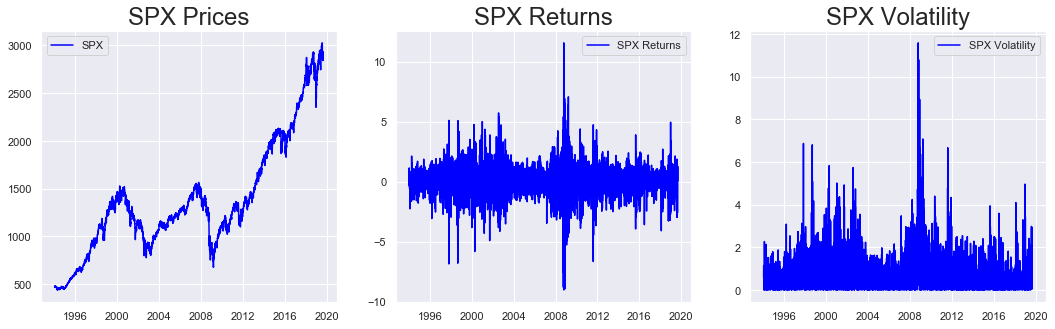

In [38]:
plt.rcParams["figure.figsize"] = (18, 5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(data.spx, color = "blue", label = "SPX")
ax[0].set_title("SPX Prices", size = 24)
ax[0].legend()

ax[1].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1].set_title("SPX Returns", size = 24)
ax[1].legend()

ax[2].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2].set_title("SPX Volatility", size = 24)
ax[2].legend()

plt.show()

- There is a clear trend (upward) in **SPX Prices**. So it clearly is not stationary.
- The trends in **Volatility** and **Returns** of **SPX** is not visibly apparent, so let us analyse them further.

### Summary Statistics

Another way to test for stationarity is to check for summary statistics (mean, variance, co-variance etc.) over a range of time periods. For Stationary datasets, these values are fairly constant.

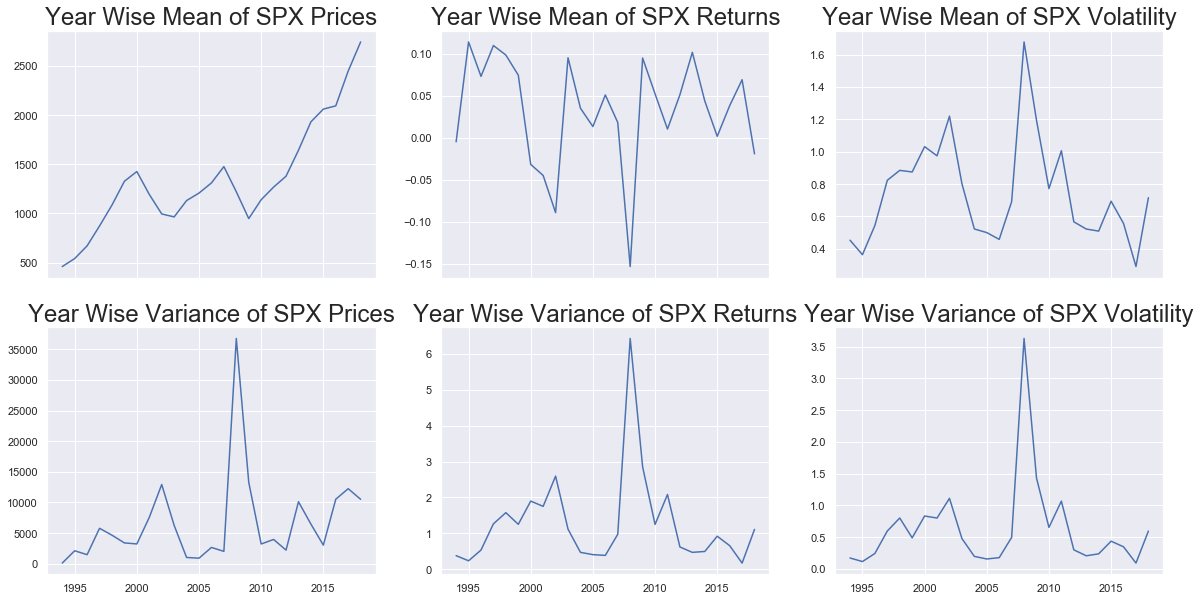

In [39]:
# Building dataframes to store yearly mean and variance
mean_df = train_df.groupby(by = train_df.index.year).mean()
var_df = train_df.groupby(by = train_df.index.year).var()

# Setting the figure size
plt.rcParams["figure.figsize"] = 20, 10

# Defining the subplots with shared x-axis
fig, ax = plt.subplots(2, 3, sharex = True)

# PLotting mean for the 3 series in the first row
ax[0, 0].plot(mean_df.spx)
ax[0, 1].plot(mean_df.spx_ret)
ax[0, 2].plot(mean_df.spx_vol)

# Setting title for the first row of plots
ax[0, 0].set_title("Year Wise Mean of SPX Prices", size = 24)
ax[0, 1].set_title("Year Wise Mean of SPX Returns", size = 24)
ax[0, 2].set_title("Year Wise Mean of SPX Volatility", size = 24)


# PLotting variance for the 3 series in the second row
ax[1, 0].plot(var_df.spx)
ax[1, 1].plot(var_df.spx_ret)
ax[1, 2].plot(var_df.spx_vol)

# Setting title for the second row of plots
ax[1, 0].set_title("Year Wise Variance of SPX Prices", size = 24)
ax[1, 1].set_title("Year Wise Variance of SPX Returns", size = 24)
ax[1, 2].set_title("Year Wise Variance of SPX Volatility", size = 24)

# Displaying the 
plt.show()

In [40]:
mean_df = train_df.groupby(by = train_df.index.year).mean()
var_df = train_df.groupby(by = train_df.index.year).var()

- **Mean**

In [41]:
mean_df

spx   spx_ret   spx_vol  Year
Date                                       
1994   460.212801 -0.004736  0.452997  1994
1995   541.571577  0.114115  0.363242  1995
1996   670.741947  0.073117  0.543670  1996
1997   872.981189  0.109858  0.823131  1997
1998  1085.262222  0.098502  0.884351  1998
1999  1327.237972  0.074586  0.874459  1999
2000  1426.546652 -0.031650  1.030979  2000
2001  1193.785482 -0.044805  0.974166  2001
2002   995.341075 -0.089034  1.219296  2002
2003   964.853755  0.095295  0.802637  2003
2004  1131.101489  0.035214  0.522317  2004
2005  1207.403307  0.013399  0.499882  2005
2006  1310.485539  0.051037  0.458066  2006
2007  1476.504636  0.018162  0.690914  2007
2008  1220.691527 -0.153229  1.677877  2008
2009   947.821417  0.094956  1.193711  2009
2010  1139.646242  0.052323  0.771489  2010
2011  1268.040269  0.010410  1.005745  2011
2012  1378.867930  0.051295  0.566507  2012
2013  1642.823831  0.101736  0.522023  2013
2014  1931.576128  0.043810  0.509046  2014
2015  2060.939697  0.001792  0.693742  2015
2016  2093.975511  0.038179  0.556376  2016
2017  2448.129043  0.069137  0.290075  2017
2018  2743.945825 -0.019127  0.715679  2018

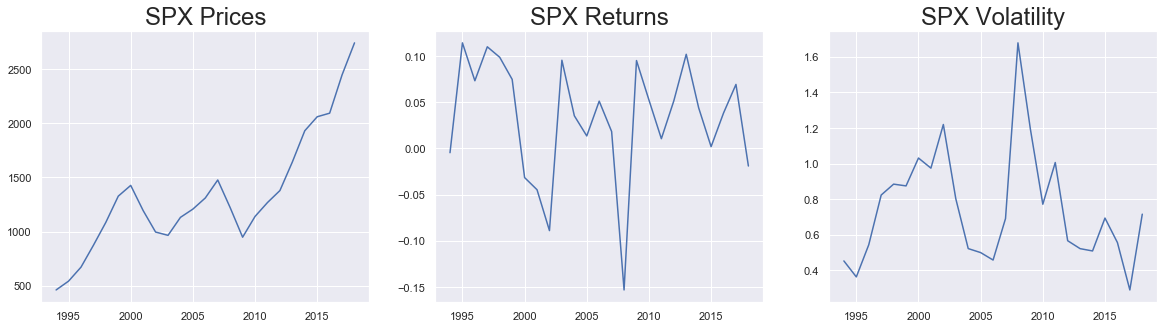

In [42]:
plt.rcParams["figure.figsize"] = 20, 5

fig, ax = plt.subplots(1, 3)

ax[0].plot(mean_df.spx)
ax[1].plot(mean_df.spx_ret)
ax[2].plot(mean_df.spx_vol)

ax[0].set_title("SPX Prices", size = 24)
ax[1].set_title("SPX Returns", size = 24)
ax[2].set_title("SPX Volatility", size = 24)

plt.show()

- **Variance**

In [43]:
var_df

spx   spx_ret   spx_vol  Year
Date                                        
1994     89.752512  0.377831  0.171843     0
1995   2100.811002  0.234782  0.115401     0
1996   1460.807832  0.534004  0.242661     0
1997   5768.277201  1.264757  0.596721     0
1998   4644.653211  1.577151  0.801807     0
1999   3380.992145  1.251251  0.489216     0
2000   3214.097866  1.899227  0.833211     0
2001   7550.150975  1.751891  0.801256     0
2002  12923.986338  2.595878  1.111436     0
2003   6249.117208  1.116279  0.478690     0
2004   1006.279627  0.469697  0.197081     0
2005    885.880823  0.406685  0.156018     0
2006   2642.256629  0.385066  0.177046     0
2007   2002.046211  0.975062  0.496195     0
2008  36781.838653  6.433050  3.630562     0
2009  13293.612748  2.852315  1.430939     0
2010   3206.423771  1.248454  0.653717     0
2011   3947.636380  2.083078  1.067758     0
2012   2207.618393  0.619583  0.300060     0
2013  10108.812523  0.469727  0.206561     0
2014   6458.494717  0.495363  0.237165     0
2015   3015.331841  0.919628  0.436503     0
2016  10519.015413  0.656966  0.347685     0
2017  12241.304143  0.171382  0.091712     0
2018  10502.595359  1.109430  0.595630     0

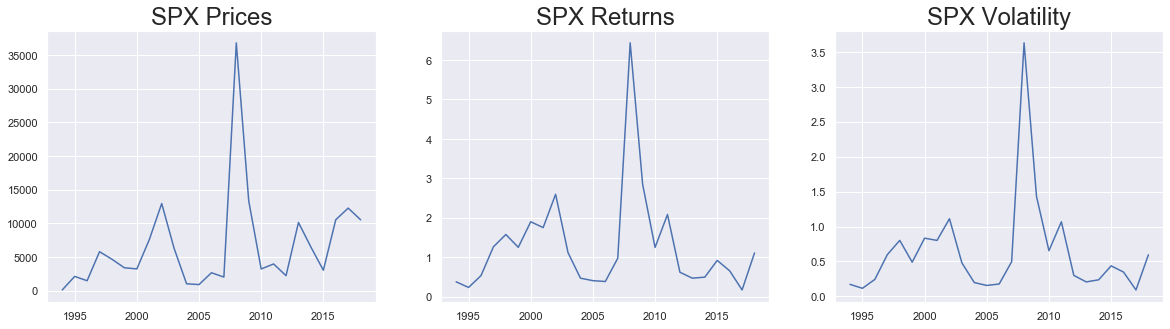

In [44]:
plt.rcParams["figure.figsize"] = 20, 5

fig, ax = plt.subplots(1, 3)

ax[0].plot(var_df.spx)
ax[1].plot(var_df.spx_ret)
ax[2].plot(var_df.spx_vol)

ax[0].set_title("SPX Prices", size = 24)
ax[1].set_title("SPX Returns", size = 24)
ax[2].set_title("SPX Volatility", size = 24)

plt.show()

- The summary statistics of **SPX Prices** clearly shows major fluctuations and hence it does not seem like a stationary dataset.
- **SPX Returns** and **SPX Volatility** do seem stationary as the summary statistics are fairly constant.

### ADF Test

The test checks the following two hypotheses.
- Null Hypothesis ($H_0$) - Series is Not Stationary
- Alternate Hypothesis ($H_1$) - The Series is Stationary

If test statistic is **less** than the critical values, then the series is **Stationary** ($H_0$ **rejected**) and vice versa.

- **SPX Prices**

In [45]:
adfuller(train_df["spx"])

(-0.5941490381718103,
 0.8722986311561449,
 0,
 6517,
 {'1%': -3.4313538173385454,
  '5%': -2.8619836014467075,
  '10%': -2.5670061256753947},
 nan)

The test statistic is greater than all the critical values, and hence the Null Hypothesis ($H_0$) cannot be rejected.

**Therefore, SPX Prices are Not Stationary.**

- **SPX Returns**

In [46]:
adfuller(train_df["spx_ret"][1:])

(-14.44375244632128,
 7.286951578520726e-27,
 34,
 6482,
 {'1%': -3.431359239667287,
  '5%': -2.8619859972456685,
  '10%': -2.5670074010110926},
 19945.163948739726)

The test statistic is less than all the critical values, and hence the Null Hypothesis ($H_0$) is rejected.

**Therefore, SPX Returns are Stationary.**

- **SPX Volatility**

In [47]:
adfuller(train_df["spx_vol"][1:])

(-6.395349225292421,
 2.057355456189615e-08,
 32,
 6484,
 {'1%': -3.4313589282423522,
  '5%': -2.8619858596459524,
  '10%': -2.567007327763762},
 14596.425117785415)

The test statistic is less than all the critical values, and hence the Null Hypothesis ($H_0$) is rejected.

**Therefore, SPX Volatility is Stationary.**

### KPSS Test

The test checks the following 2 hypotheses - 
- Null Hypothesis ($H_0$) - Series is Stationary
- Alternate Hypothesis ($H_1$) - The Series is Not Stationary

If test statistic is **greater** than the critical values, then the series is **Not Stationary** ($H_0$ **rejected**) and vice versa.

- **SPX Prices**

In [48]:
kpss(train_df["spx"])

(12.200477478996644,
 0.01,
 35,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The test statistic is greater than all the critical values, and hence the Null Hypothesis ($H_0$) is rejected.

**Therefore, SPX Prices are Not Stationary.**

- **SPX Returns**

In [49]:
kpss(train_df["spx_ret"][1:])

(0.13030239047479025,
 0.1,
 35,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The test statistic is less than all the critical values, and hence the Null Hypothesis ($H_0$) cannot be rejected.

**Therefore, SPX Returns are Stationary.**

- **SPX Volatility**

In [50]:
kpss(train_df["spx_vol"][1:])

(0.6883363510998818,
 0.014605786263647108,
 35,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The test statistic is greater than the critical values at $10\%$ confidence level, and is less than all other critical levels. Hence, at $10%$ confidence level, the Null Hypothesis ($H_0$) could be rejected. In other critical levels, $H_0$ could be accepted

**Therefore, SPX Volatility could be Not Stationary.**

### Stationarity Conclusion

- **SPX Prices**: Through all the tests and visual heuristics, it is evident that the Prices are **Not Stationary**.
- **SPX Returns**: Through all the tests and visual heuristics, it is evident that the Returns are **Stationary**.
- On the other hand, the tests seem to contradict for Volatility
    - ADF Test: SPX Volatility is Stationary.
    - KPSS Test: SPX Volatility is Not Stationary (at $10\%$ confidence level).
- In such case we can conclude that **SPX Volatility** is **Difference Stationary** - which is a type of non-stationary data that can be made stationary by differencing. The rerasons for the conclusion are clearly explained [here](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)